# BiologDataAnalysis

This notebook process the raw data from a biolog plate reader assay. 

###### Jeffrey Czajka - March 8 2023

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker  # Import the ticker module

load biolog data

In [2]:
biologData = pd.read_csv('Nitrogens_format1_71h_corrected.csv')
biologData.shape

(792, 27)

In [3]:
biologData.head()

Plate:                A     1.3 PlateFormat Endpoint Absorbance     Raw  \
0    NaN  Temperature(¡C)  1.0000           2        3          4       5   
1    NaN               24  0.1115      0.1046   0.1062     0.1043  0.1066   
2    NaN              NaN  0.1101      0.1031   0.1069     0.1085    0.11   
3    NaN              NaN  0.2041      0.1054   0.1225     0.1097  0.1068   
4    NaN              NaN  0.1081      0.1054   0.1126     0.1128  0.1595   

    FALSE       1  Unnamed: 9  ...      12      96     1.2       8  \
0       6  7.0000      8.0000  ...  3.0000  4.0000  5.0000  6.0000   
1  0.1083  0.1041      0.1061  ...  0.1031  0.1030  0.1055  0.1073   
2  0.1033  0.1116      0.1095  ...  0.1058  0.1091  0.1103  0.1025   
3  0.1069  0.1116      0.1138  ...  0.1189  0.1088  0.1056  0.1061   
4  0.1155  0.1106      0.1106  ...  0.1148  0.1142  0.1441  0.1146   

   Unnamed: 21 Unnamed: 22  Unnamed: 23  Unnamed: 24  Unnamed: 25  Unnamed: 26  
0       7.0000      8.0000       9.0000      10.0000      11.0000      12.0000  
1       0.1031      0.1048       0.1037       0.1012       0.1108       0.1020  
2       0.1090      0.1073       0.1064       0.1029       0.1020       0.1012  
3       0.1084      0.1112       0.1151       0.1109       0.1053       0.1033  
4       0.1091      0.1103       0.1096       0.1058       0.1062       0.1028  

[5 rows x 27 columns]

### used in downstream plotting.
Single column per data type. Output is a plate with columns for each data point. 

In [4]:
# from collections import defaultdict
# dfs_590 = defaultdict(lambda: defaultdict(dict))
# dfs_750 = defaultdict(lambda: defaultdict(dict))

# initialize dataframes to hold wavelength readings.
PlateA_590,PlateB_590,PlateC_590,PlateD_590,PlateE_590,PlateF_590 = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()
PlateA_750,PlateB_750,PlateC_750,PlateD_750,PlateE_750,PlateF_750 = pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame(),pd.DataFrame()


# the spreadsheet contains dynamic data that is loops from plates A->F->A. 
# Each iteration of A repressents a new time point.
# Keep track if we have looped through A (downstream on same timepoint).
onIterationA = 0
tp = 0

# open file.
with open('Nitrogens_format1_71h_corrected.csv') as fp:
    counter = 0
    
    # iterate through file.
    for enum,row in enumerate(fp):
        data,data2 = [],[]
    
        # gather data to tell which plate we are.
        plate = row.strip().split(',')[1]
        
        # tracking the plate.    
        if (row.strip().split(',')[0] == 'Plate:') | (enum==0):
            plate_tracker = plate
        
        # if this is == 'A', reset the loop iteration. 
        if plate == 'A':
            onIterationA = 1
            continue

        
        if (plate == 'Temperature(Â¡C)') | (plate == 'Temperature(¡C)') |(row.strip().split(',')[0] == '~End') |  (row.strip().split(',')[0]== 'Plate:') | ((row.strip().split(',')[3] == '')):
            headers = row.strip().split(',')[2:14]
        
        # skipping line. 
        if (plate == 'Temperature(Â¡C)') | (plate == 'Temperature(¡C)') |(row.strip().split(',')[0] == '~End') |  (row.strip().split(',')[0]== 'Plate:') | ((row.strip().split(',')[3] == '')):
            continue        
        
        # we have cycled through plate A. 
        if (onIterationA==1):
            
            # accumulate data. 
            count = 0
            
            # there are 8 rows per plate. Grab all the associated plate data. 
            while count<8:
                data.append(row.strip().split(',')[2:14])
                
                data2.append(row.strip().split(',')[15:28])
                row = next(fp)
                count+=1

            # make the plate data a single column    
            temp_590 = [item for sublist in data for item in sublist]
            temp_750 = [item for sublist in data2 for item in sublist]

            temp_590 = pd.DataFrame(temp_590)
            temp_750 = pd.DataFrame(temp_750)            

            # store data into appropriate dataframe.
            if plate_tracker == 'A':
                if counter == 0:
                    PlateA_590 = temp_590.copy()
                else:
                    PlateA_590 = pd.concat([PlateA_590,temp_590],axis=1,ignore_index=True)
                    
            if plate_tracker == 'B':
                if counter == 0:
                    PlateB_590 = temp_590.copy()
                else:
                    PlateB_590 = pd.concat([PlateB_590,temp_590],axis=1,ignore_index=True)                    
            
            if plate_tracker == 'C':
                if counter == 0:
                    PlateC_590 = temp_590.copy()
                else:
                    PlateC_590 = pd.concat([PlateC_590,temp_590],axis=1,ignore_index=True)                    
            
            if plate_tracker == 'D':
                if counter == 0:
                    PlateD_590 = temp_590.copy()
                else:
                    PlateD_590 = pd.concat([PlateD_590,temp_590],axis=1,ignore_index=True)
           
            if plate_tracker == 'E':
                if counter == 0:
                    PlateE_590 = temp_590.copy()
                else:
                    PlateE_590 = pd.concat([PlateE_590,temp_590],axis=1,ignore_index=True)
            
            if plate_tracker == 'F':
                if counter == 0:
                    PlateF_590 = temp_590.copy()
                else:
                    PlateF_590 = pd.concat([PlateF_590,temp_590],axis=1,ignore_index=True)

                    
                    
            if plate_tracker == 'A':
                if counter == 0:
                    PlateA_750 = temp_750.copy()
                else:
                    PlateA_750 = pd.concat([PlateA_750,temp_750],axis=1,ignore_index=True)
                    
            if plate_tracker == 'B':
                if counter == 0:
                    PlateB_750 = temp_750.copy()
                else:
                    PlateB_750 = pd.concat([PlateB_750,temp_750],axis=1,ignore_index=True)                    
            
            if plate_tracker == 'C':
                if counter == 0:
                    PlateC_750 = temp_750.copy()
                else:
                    PlateC_750 = pd.concat([PlateC_750,temp_750],axis=1,ignore_index=True)                    
            
            if plate_tracker == 'D':
                if counter == 0:
                    PlateD_750 = temp_750.copy()
                else:
                    PlateD_750 = pd.concat([PlateD_750,temp_750],axis=1,ignore_index=True)
           
            if plate_tracker == 'E':
                if counter == 0:
                    PlateE_750 = temp_750.copy()
                else:
                    PlateE_750 = pd.concat([PlateE_750,temp_750],axis=1,ignore_index=True)
            
            if plate_tracker == 'F':
                if counter == 0:
                    PlateF_750 = temp_750.copy()
                else:
                    PlateF_750 = pd.concat([PlateF_750,temp_750],axis=1,ignore_index=True)
                    
                    
                    
                    
                    
                    
                    

            counter += 1

            if plate_tracker == 'F':
                onIterationA = 0
                tp += 1
            continue
#             print(plate_tracker)
            
        

In [5]:
PlateA_590

0       1       2       3       4       5       6       7       8   \
0   0.1115   0.307   0.457  0.4313  0.5808  0.5966   0.387  0.4444   0.522   
1   0.1046  0.2775  0.7777  1.0254  0.8755  1.2092  1.2283  1.0162   1.149   
2   0.1062   0.059   0.306  0.3347  0.3684  0.6455  0.2251   0.232  0.2562   
3   0.1043  0.3354  0.5269  0.4685   0.567  0.9594  0.3767  0.4346  0.5283   
4   0.1066  0.3808  0.7371  0.5415  0.6538  1.2033  0.7988  1.1029   1.359   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
91  0.1148  0.3274  0.6793  0.5819    0.66  1.0443  0.5851  0.8525   1.277   
92  0.1174  0.3383  0.7591  0.6516  0.8062  1.1239  0.5969  0.8617  1.5049   
93  0.1084  0.3099   0.571  0.7318  0.8385   1.062  0.4372  0.6114  1.1638   
94  0.1103  0.3709  0.5808  0.6331  0.5256  0.9444  0.4092  0.5835  1.0795   
95  0.1106    0.23  0.3392   0.397  0.5895  0.4164  0.4802  0.7503  1.1587   

        9       10  
0   0.5976  0.5751  
1   1.2325  1.2686  
2   0.2846  0.2956  
3   0.6414  0.7373  
4   1.4609  1.4857  
..     ...     ...  
91  1.7229  1.8452  
92  1.2123  1.4268  
93  1.6846  1.8184  
94  1.4769  1.7381  
95  1.3278  1.3598  

[96 rows x 11 columns]

timepoints

In [6]:
tp = [0,21,35,48,57,71.5,79,95.5,120,144,168]

input the nitrogen, phosphorus, sulfur source to plates. 

In [7]:
legend = well_sources = ['Negative Control',
'Ammonia',
'Nitrite',
'Nitrate',
'Urea',
'Biuret',
'L-Alanine',
'L-Arginine',
'L-Asparagine',
'L-Aspartic Acid',
'L-Cysteine',
'L-Glutamic Acid',
'L-Glutamine',
'Glycine',
'L-Histidine',
'L-Isoleucine',
'L-Leucine',
'L-Lysine',
'L-Methionine',
'L-Phenylalanine',
'L-Proline',
'L-Serine',
'L-Threonine',
'L-Tryptophan',
'L-Tyrosine',
'L-Valine',
'D-Alanine',
'D-Asparagine',
'D-Aspartic Acid',
'D-Glutamic Acid',
'D-Lysine',
'D-Serine',
'D-Valine',
'L-Citrulline',
'L-Homoserine',
'L-Ornithine D-1 N-Acetyl-LGlutamic Acid',
'N-Acetyl-L- Glutamic Acid ',
'N-Phthaloyl-LGlutamic Acid',
'L-Pyroglutamic Acid',
'Hydroxylamine',
'Methylamine',
'N-Amylamine',
'N-Butylamine',
'Ethylamine',
'Ethanolamine',
'Ethylenediamine',
'Putrescine',
'Agmatine',
'Histamine',
'b-Phenylethylamine',
'Tyramine',
'Acetamide',
'Formamide',
'Glucuronamide',
'D,L-Lactamide',
'D-Glucosamine',
'D-Galactosamine',
'D-Mannosamine',
'N-Acetyl-DGlucosamine',
'N-Acetyl-DGalactosamine',
'N-Acetyl-DMannosamine',
'Adenine',
'Adenosine',
'Cytidine',
'Cytosine',
'Guanine',
'Guanosine',
'Thymine',
'Thymidine',
'Uracil',
'Uridine',
'Inosine',
'Xanthine',
'Xanthosine',
'Uric Acid',
'Alloxan',
'Allantoin',
'Parabanic Acid',
'D,L-a-Amino-NButyric Acid',
'g-Amino-NButyric Acid',
'e-Amino-NCaproic Acid',
'D,L-a-AminoCaprylic Acid',
'd-Amino-NValeric Acid',
'a-Amino-NValeric Acid',
'Ala-Asp',
'Ala-Gln',
'Ala-Glu',
'Ala-Gly',
'Ala-His',
'Ala-Leu',
'Ala-Thr',
'Gly-Asn',
'Gly-Gln',
'Gly-Glu',
'Gly-Met',
'Met-Ala',
'Negative Control',
'Phosphate',
'Pyrophosphate',
'Trimetaphosphate',
'Tripolyphosphate',
'Triethyl Phosphate',
'Hypophosphite',
'Adenosine- 2’- monophosphate',
'Adenosine- 3’- monophosphate',
'Adenosine- 5’- monophosphate',
'Adenosine- 2’,3’- Cyclic monophosphate',
'Adenosine- 3’,5’- Cyclic monophosphate',
'Thiophosphate',
'Dithiophosphate',
'D,L-a-Glycerol Phosphate',
'b-Glycerol Phosphate',
'Carbamyl Phosphate',
'D-2-PhosphoGlyceric Acid',
'D-3-PhosphoGlyceric Acid',
'Guanosine- 2’- monophosphate',
'Guanosine- 3’- monophosphate',
'Guanosine- 5’- monophosphate',
'Guanosine- 2’,3’- Cyclic monophosphate',
'Guanosine- 3’,5’- Cyclic monophosphate',
'Phosphoenol Pyruvate',
'PhosphoGlycolic Acid',
'D-Glucose-1- Phosphate',
'D-Glucose-6- Phosphate',
'2-Deoxy-DGlucose 6- Phosphate',
'D-Glucosamine6-Phosphate',
'6-PhosphoGluconic Acid',
'Cytidine- 2’- monophosphate',
'Cytidine- 3’- monophosphate',
'Cytidine- 5’- monophosphate',
'Cytidine- 2’,3’- Cyclic monophosphate',
'Cytidine- 3’,5’- Cyclic monophosphate',
'D-Mannose-1- Phosphate',
'D-Mannose-6- Phosphate',
'Cysteamine-SPhosphate',
'Phospho-LArginine',
'O-Phospho-DSerine',
'O-Phospho-LSerine',
'O-Phospho-LThreonine',
'Uridine- 2’- monophosphate',
'Uridine- 3’- monophosphate',
'Uridine- 5’- monophosphate',
'Uridine- 2’,3’- Cyclic monophosphate',
'Uridine- 3’,5’- Cyclic monophosphate',
'O-Phospho-DTyrosine',
'O-Phospho-LTyrosine',
'Phosphocreatine',
'Phosphoryl Choline',
'O-PhosphorylEthanolamine',
'Phosphono Acetic Acid',
' 2-Aminoethyl Phosphonic Acid',
'Methylene Diphosphonic Acid',
'Thymidine- 3’- monophosphate',
'Thymidine- 5’- monophosphate',
'Inositol Hexaphosphate',
'Thymidine 3’,5’- Cyclic monophosphate',
'Negative Control',
'Sulfate',
'Thiosulfate',
'Tetrathionate',
'Thiophosphate',
'Dithiophosphate',
'L-Cysteine',
'D-Cysteine',
'L-CysteinylGlycine',
'L-Cysteic Acid',
'Cysteamine',
'L-Cysteine Sulfinic Acid',
'N-Acetyl-LCysteine',
'S-Methyl-LCysteine',
'Cystathionine',
'Lanthionine',
'Glutathione',
'D,L-Ethionine',
'L-Methionine',
'D-Methionine',
'Glycyl-LMethionine',
'N-Acetyl-D,LMethionine',
'L- Methionine Sulfoxide',
'L-Methionine Sulfone',
'L-Djenkolic Acid',
'Thiourea',
'1-Thio-b-DGlucose',
'D,L-Lipoamide',
'Taurocholic Acid',
'Taurine',
'Hypotaurine',
'p-Amino Benzene Sulfonic Acid',
'Butane Sulfonic Acid',
'2-Hydroxyethane Sulfonic Acid',
'Methane Sulfonic Acid',
'Tetramethylene Sulfone']

In [8]:
plate_well = [
    'PM3B_A1',
'PM3B_A2',
'PM3B_A3',
'PM3B_A4',
'PM3B_A5',
'PM3B_A6',
'PM3B_A7',
'PM3B_A8',
'PM3B_A9',
'PM3B_A10',
'PM3B_A11',
'PM3B_A12',
'PM3B_B1',
'PM3B_B2',
'PM3B_B3',
'PM3B_B4',
'PM3B_B5',
'PM3B_B6',
'PM3B_B7',
'PM3B_B8',
'PM3B_B9',
'PM3B_B10',
'PM3B_B11',
'PM3B_B12',
'PM3B_C1',
'PM3B_C2',
'PM3B_C3',
'PM3B_C4',
'PM3B_C5',
'PM3B_C6',
'PM3B_C7',
'PM3B_C8',
'PM3B_C9',
'PM3B_C10',
'PM3B_C11',
'PM3B_C12',
'PM3B_D1',
'PM3B_D2',
'PM3B_D3',
'PM3B_D4',
'PM3B_D5',
'PM3B_D6',
'PM3B_D7',
'PM3B_D8',
'PM3B_D9',
'PM3B_D10',
'PM3B_D11',
'PM3B_D12',
'PM3B_E1',
'PM3B_E2',
'PM3B_E3',
'PM3B_E4',
'PM3B_E5',
'PM3B_E6',
'PM3B_E7',
'PM3B_E8',
'PM3B_E9',
'PM3B_E10',
'PM3B_E11',
'PM3B_E12',
'PM3B_F1',
'PM3B_F2',
'PM3B_F3',
'PM3B_F4',
'PM3B_F5',
'PM3B_F6',
'PM3B_F7',
'PM3B_F8',
'PM3B_F9',
'PM3B_F10',
'PM3B_F11',
'PM3B_F12',
'PM3B_G1',
'PM3B_G2',
'PM3B_G3',
'PM3B_G4',
'PM3B_G5',
'PM3B_G6',
'PM3B_G7',
'PM3B_G8',
'PM3B_G9',
'PM3B_G10',
'PM3B_G11',
'PM3B_G12',
'PM3B_H1',
'PM3B_H2',
'PM3B_H3',
'PM3B_H4',
'PM3B_H5',
'PM3B_H6',
'PM3B_H7',
'PM3B_H8',
'PM3B_H9',
'PM3B_H10',
'PM3B_H11',
'PM3B_H12',
'PM4A_A1',
'PM4A_A2',
'PM4A_A3',
'PM4A_A4',
'PM4A_A5',
'PM4A_A6',
'PM4A_A7',
'PM4A_A8',
'PM4A_A9',
'PM4A_A10',
'PM4A_A11',
'PM4A_A12',
'PM4A_B1',
'PM4A_B2',
'PM4A_B3',
'PM4A_B4',
'PM4A_B5',
'PM4A_B6',
'PM4A_B7',
'PM4A_B8',
'PM4A_B9',
'PM4A_B10',
'PM4A_B11',
'PM4A_B12',
'PM4A_C1',
'PM4A_C2',
'PM4A_C3',
'PM4A_C4',
'PM4A_C5',
'PM4A_C6',
'PM4A_C7',
'PM4A_C8',
'PM4A_C9',
'PM4A_C10',
'PM4A_C11',
'PM4A_C12',
'PM4A_D1',
'PM4A_D2',
'PM4A_D3',
'PM4A_D4',
'PM4A_D5',
'PM4A_D6',
'PM4A_D7',
'PM4A_D8',
'PM4A_D9',
'PM4A_D10',
'PM4A_D11',
'PM4A_D12',
'PM4A_E1',
'PM4A_E2',
'PM4A_E3',
'PM4A_E4',
'PM4A_E5',
'PM4A_E6',
'PM4A_E7',
'PM4A_E8',
'PM4A_E9',
'PM4A_E10',
'PM4A_E11',
'PM4A_E12',
'PM4A_F1',
'PM4A_F2',
'PM4A_F3',
'PM4A_F4',
'PM4A_F5',
'PM4A_F6',
'PM4A_F7',
'PM4A_F8',
'PM4A_F9',
'PM4A_F10',
'PM4A_F11',
'PM4A_F12',
'PM4A_G1',
'PM4A_G2',
'PM4A_G3',
'PM4A_G4',
'PM4A_G5',
'PM4A_G6',
'PM4A_G7',
'PM4A_G8',
'PM4A_G9',
'PM4A_G10',
'PM4A_G11',
'PM4A_G12',
'PM4A_H1',
'PM4A_H2',
'PM4A_H3',
'PM4A_H4',
'PM4A_H5',
'PM4A_H6',
'PM4A_H7',
'PM4A_H8',
'PM4A_H9',
'PM4A_H10',
'PM4A_H11',
'PM4A_H12',

]

In [9]:
# use number as the legend (for post processing. )
legend = np.arange(0,192)

In [10]:
PlateA_590.index = legend[0:96]
PlateB_590.index = legend[0:96]
PlateC_590.index = legend[0:96]
PlateA_750.index = legend[0:96]
PlateB_750.index = legend[0:96]
PlateC_750.index = legend[0:96]

PlateD_590.index = legend[96:192]
PlateE_590.index = legend[96:192]
PlateF_590.index = legend[96:192]
PlateD_750.index = legend[96:192]
PlateE_750.index = legend[96:192]
PlateF_750.index = legend[96:192]

In [11]:
# PlateA_590.index = plate_well[0:96]
# PlateB_590.index = plate_well[0:96]
# PlateC_590.index = plate_well[0:96]
# PlateA_750.index = plate_well[0:96]
# PlateB_750.index = plate_well[0:96]
# PlateC_750.index = plate_well[0:96]

# PlateD_590.index = plate_well[96:192]
# PlateE_590.index = plate_well[96:192]
# PlateF_590.index = plate_well[96:192]
# PlateD_750.index = plate_well[96:192]
# PlateE_750.index = plate_well[96:192]
# PlateF_750.index = plate_well[96:192]

In [12]:
legend[96:192]

array([ 96,  97,  98,  99, 100, 101, 102, 103, 104, 105, 106, 107, 108,
       109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121,
       122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134,
       135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147,
       148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160,
       161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173,
       174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186,
       187, 188, 189, 190, 191])

#### Visualizing data. We want to ensure that individual sources had significant growth above the control conditions./

590 plate 3 (nitrogen sources).

/var/folders/kn/zzns_smn1q79xdnf1tgqk__r0000gn/T/ipykernel_25661/2382028662.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y_590 = concatenated_df.groupby(level=0, axis=1).std()


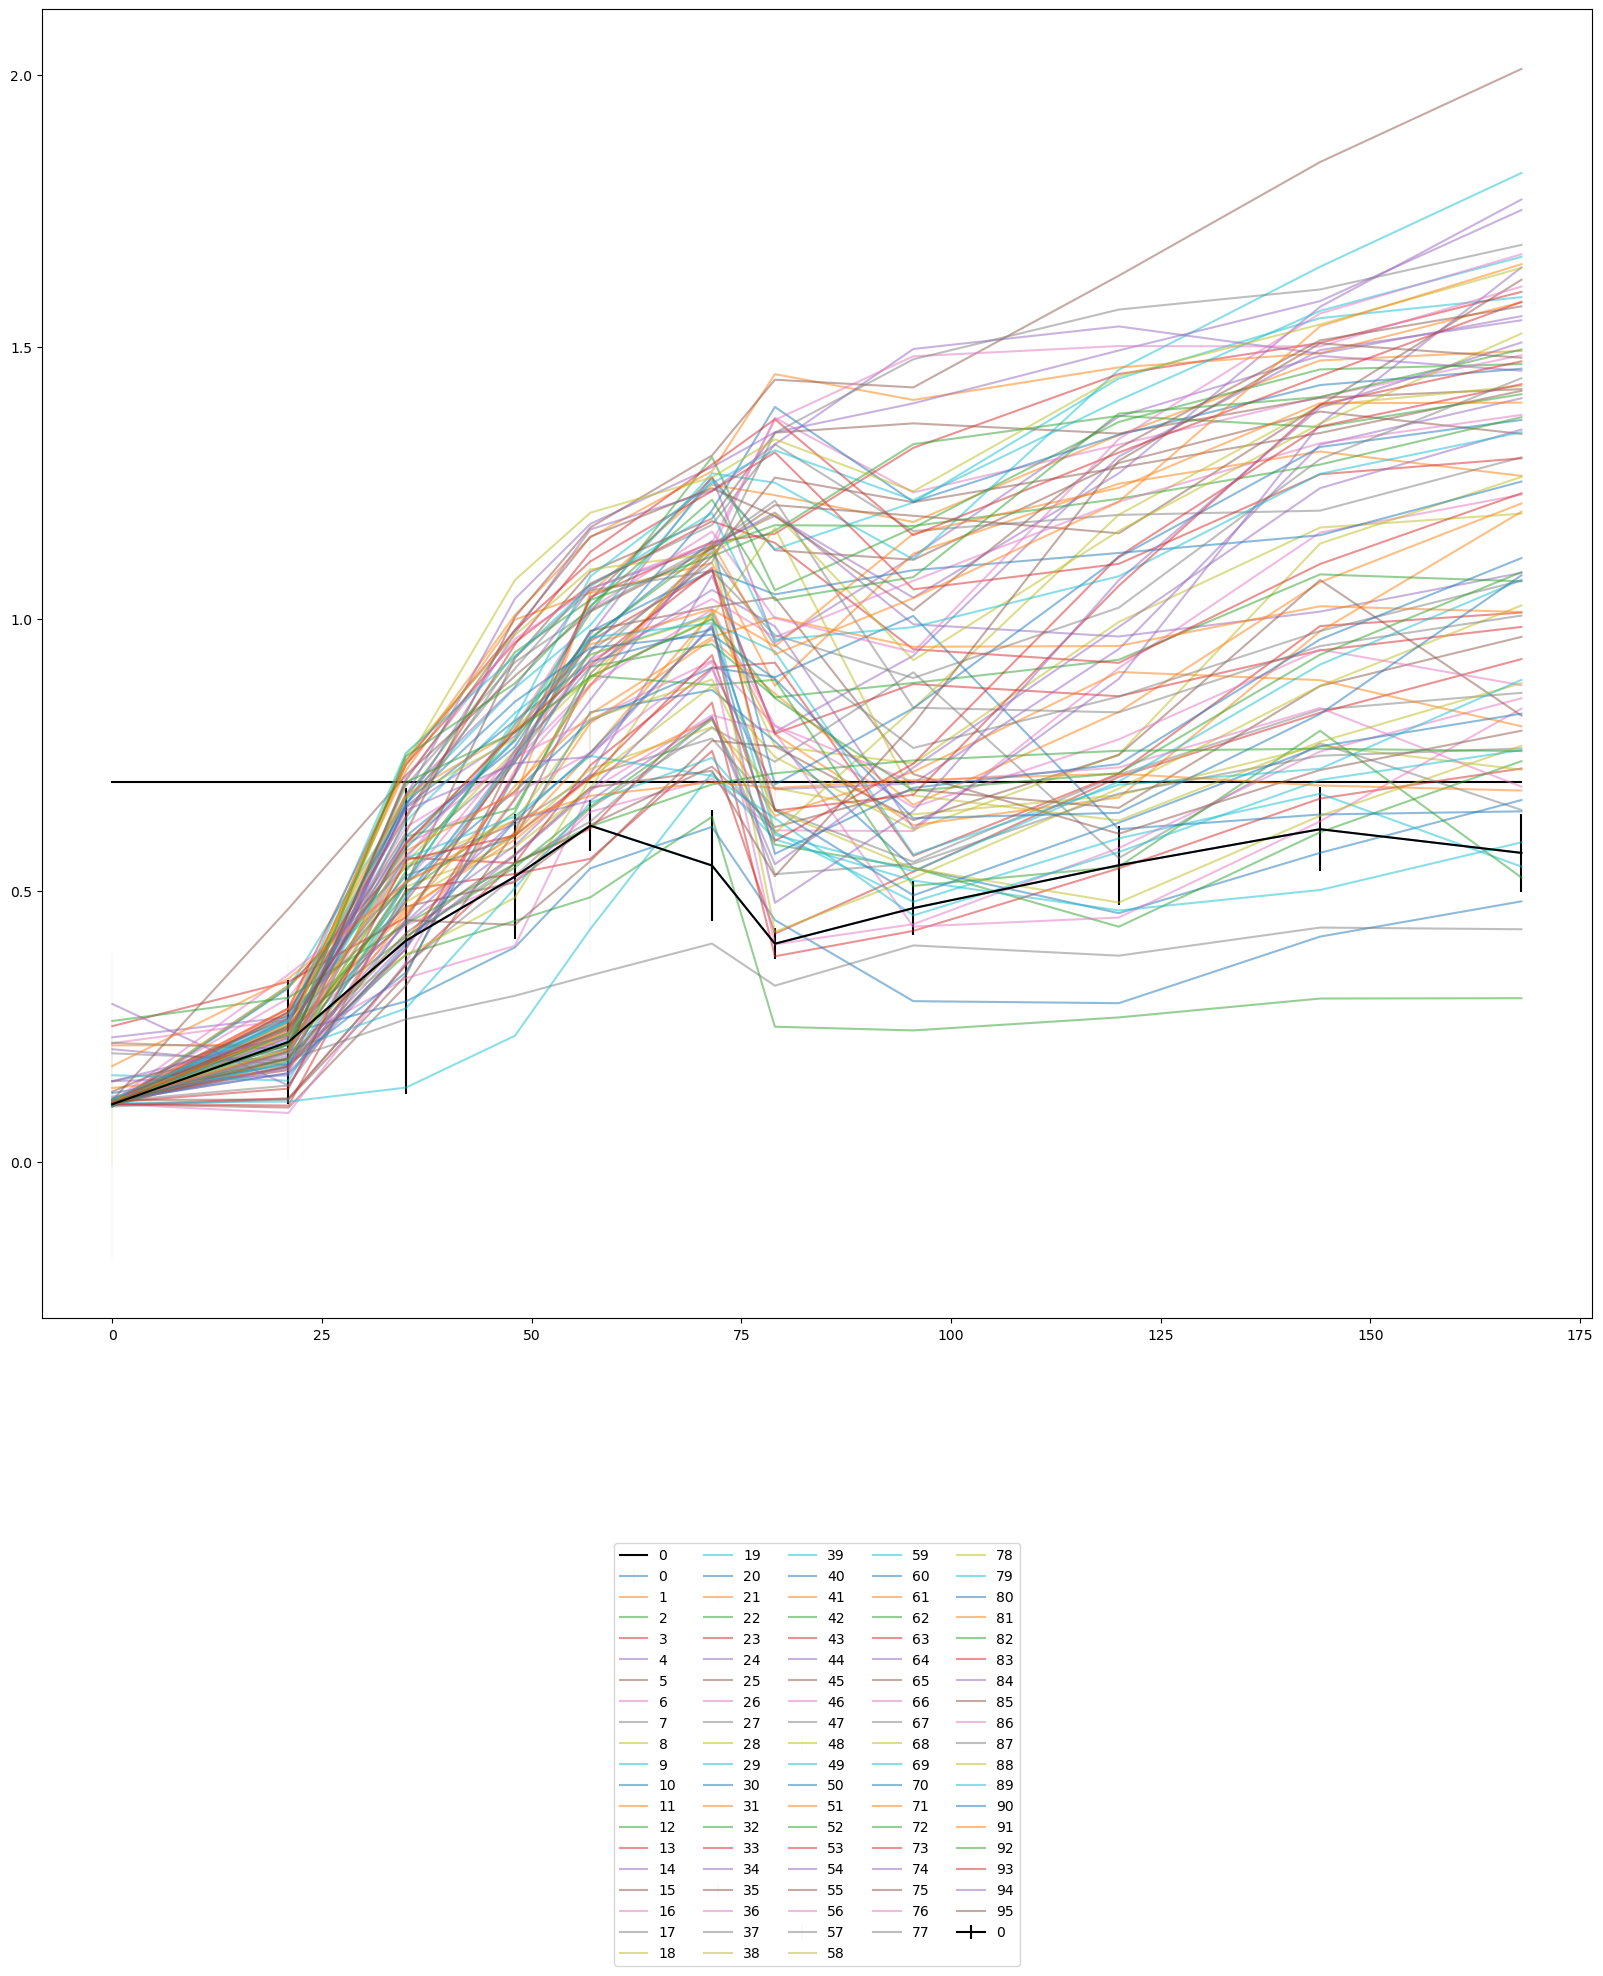

In [13]:

concatenated_df = pd.concat([PlateA_590.astype(float), PlateB_590.astype(float), PlateC_590.astype(float)], axis=1)
x_590 = concatenated_df.groupby(level=0, axis=1).mean()
y_590 = concatenated_df.groupby(level=0, axis=1).std()


# x_590 = pd.concat([PlateA_590.astype(float), PlateB_590.astype(float), PlateC_590.astype(float)],sort=False).groupby(level=0).mean()
# x = pd.concat([PlateA_590.astype(float), PlateB_590.astype(float), PlateC_590.astype(float),PlateD_590.astype(float),PlateE_590.astype(float),PlateF_590.astype(float)],sort=False).groupby(level=0).mean()
# y = pd.concat([PlateA_590.astype(float), PlateB_590.astype(float), PlateC_590.astype(float),PlateD_590.astype(float),PlateE_590.astype(float),PlateF_590.astype(float)],sort=False).groupby(level=0).std()
# y_590 = pd.concat([PlateA_590.astype(float), PlateB_590.astype(float), PlateC_590.astype(float)],sort=False).groupby(level=0).std()
x_590.columns = tp
y_590.columns = tp
# x1 = 

ax = x_590.T.plot(legend=True,yerr = y_590,elinewidth=0.1,alpha=0.5,figsize=(20,17))

# x_590.loc['Negative Control'].plot(ax=ax,color='k',yerr = y_590.loc['Negative Control'],legend=True)
x_590.loc[0].plot(ax=ax,color='k',yerr = y_590.loc[0],legend=False)
# x.loc[96].plot(ax=ax,color='k',yerr = y.loc[96],legend=False)
# x.loc[156].plot(ax=ax,color='k',yerr = y.loc[156],legend=False)
threshold = 0.70
x = pd.DataFrame([threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold])
x.index = tp
x.plot(ax=ax,color='k',legend=False)



ax.legend(ncol=5,bbox_to_anchor=(0.5, -0.5), loc='lower center')
# x.T.plot(legend=True,yerr = y,alpha=0.5,figsize=(20,10))


750 nm plate 3 (nitrogen sources).

/var/folders/kn/zzns_smn1q79xdnf1tgqk__r0000gn/T/ipykernel_25661/3946299952.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y_750 = concatenated_df.groupby(level=0, axis=1).std()


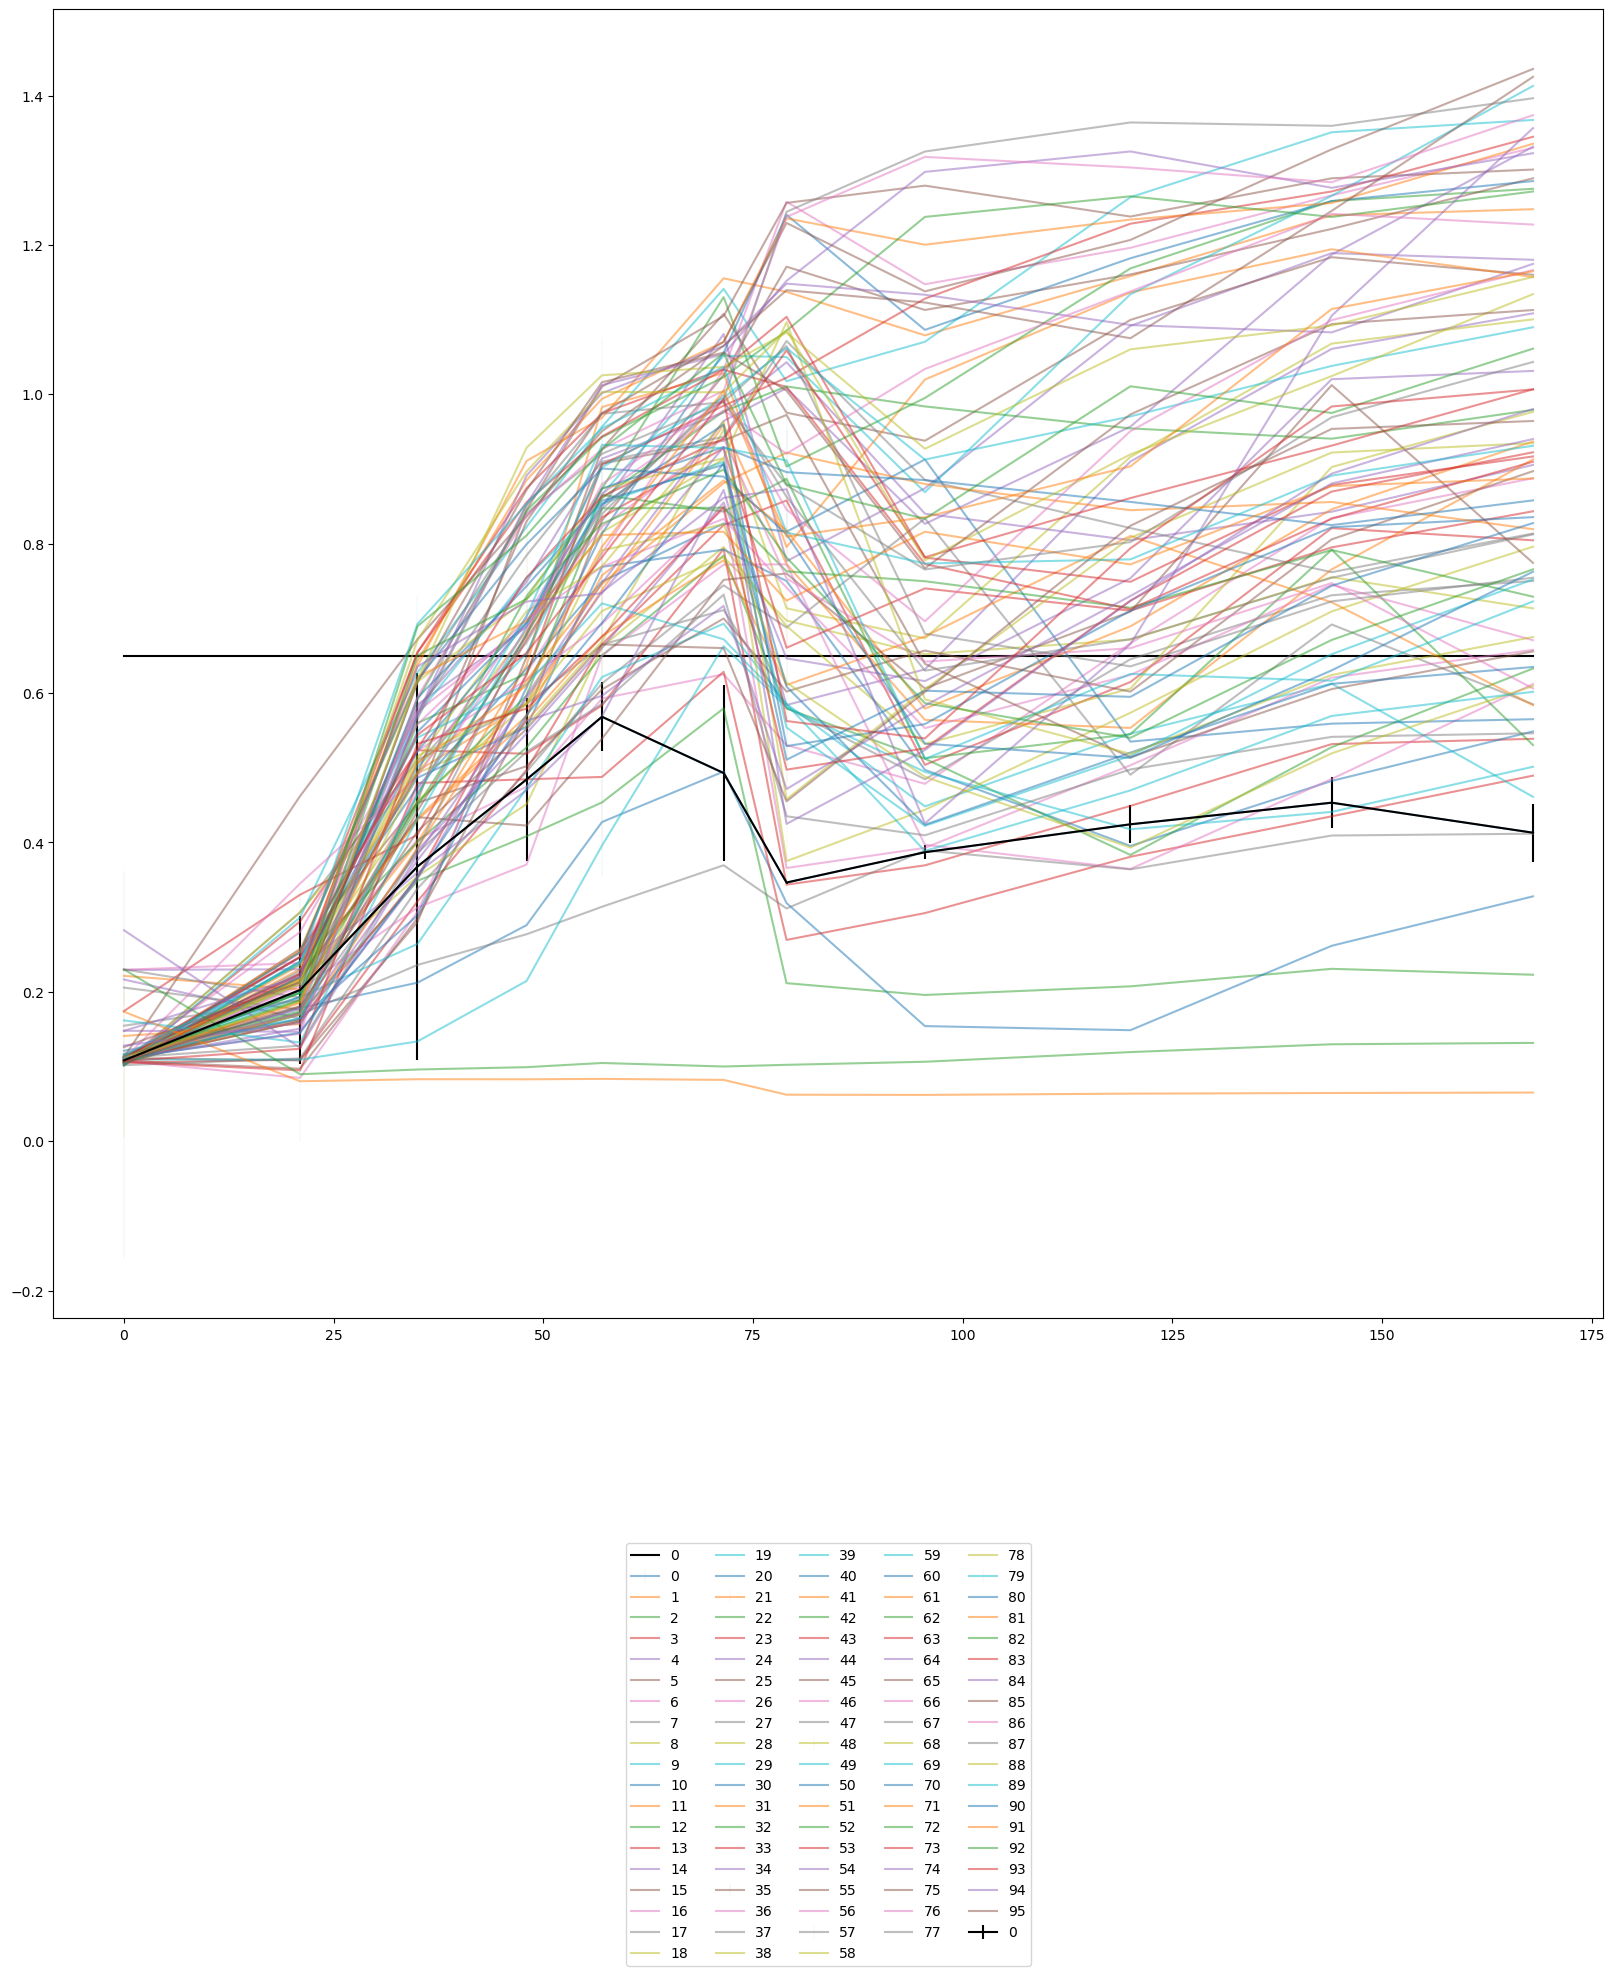

In [14]:

concatenated_df = pd.concat([PlateA_750.astype(float), PlateB_750.astype(float), PlateC_750.astype(float)], axis=1)
x_750 = concatenated_df.groupby(level=0, axis=1).mean()
y_750 = concatenated_df.groupby(level=0, axis=1).std()

# x_750 = pd.concat([PlateA_750.astype(float), PlateB_750.astype(float), PlateC_750.astype(float),PlateD_750.astype(float),PlateE_750.astype(float),PlateF_750.astype(float)],sort=False).groupby(level=0).mean()
# y_750 = pd.concat([PlateA_750.astype(float), PlateB_750.astype(float), PlateC_750.astype(float),PlateD_750.astype(float),PlateE_750.astype(float),PlateF_750.astype(float)],sort=False).groupby(level=0).std()
# x_750 = pd.concat([PlateA_750.astype(float), PlateB_750.astype(float), PlateC_750.astype(float)],sort=False).groupby(level=0).mean()
# y_750 = pd.concat([PlateA_750.astype(float), PlateB_750.astype(float), PlateC_750.astype(float)],sort=False).groupby(level=0).std()


x_750.columns = tp
y_750.columns = tp
# x1 = 

ax = x_750.T.plot(legend=True,yerr = y_750,elinewidth=0.1,alpha=0.5,figsize=(20,17))

# x_750.loc['Negative Control'].plot(ax=ax,color='k',yerr = y_750.loc['Negative Control'],legend=True)
x_750.loc[0].plot(ax=ax,color='k',yerr = y_750.loc[0],legend=False)
# x.loc[96].plot(ax=ax,color='k',yerr = y.loc[96],legend=False)
# x.loc[156].plot(ax=ax,color='k',yerr = y.loc[156],legend=False)
threshold = 0.65
x = pd.DataFrame([threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold])
x.index = tp
x.plot(ax=ax,color='k',legend=False)



ax.legend(ncol=5,bbox_to_anchor=(0.5, -0.5), loc='lower center')
# x.T.plot(legend=True,yerr = y,alpha=0.5,figsize=(20,10))


590 pm3 graphs.

#### lets look at the highest the individual wells got in each plate. 



In [15]:
# 750 nm. 
print(PlateA_750.loc[0],PlateB_750.loc[0],PlateC_750.loc[0])

0     0.1118
1     0.2815
2     0.4104
3     0.3957
4     0.5431
5     0.5519
6     0.3459
7     0.3853
8     0.4195
9     0.4474
10    0.4183
Name: 0, dtype: object 0     0.1068
1     0.2343
2     0.6034
3     0.6066
4     0.6214
5     0.5698
6     0.3453
7     0.3787
8     0.4016
9     0.4227
10    0.3717
Name: 0, dtype: object 0     0.1063
1     0.0916
2     0.0897
3     0.4507
4     0.5403
5     0.3572
6     0.3479
7     0.3968
8     0.4519
9     0.4897
10    0.4492
Name: 0, dtype: object


In [16]:
# 590 nm wavelength. 
print(PlateA_590.loc[0],PlateB_590.loc[0],PlateC_590.loc[0])

0     0.1115
1      0.307
2      0.457
3     0.4313
4     0.5808
5     0.5966
6      0.387
7     0.4444
8      0.522
9     0.5976
10    0.5751
Name: 0, dtype: object 0     0.1052
1     0.2645
2     0.6616
3      0.653
4     0.6717
5     0.6135
6     0.3845
7     0.4346
8     0.4897
9     0.5444
10    0.4952
Name: 0, dtype: object 0     0.1041
1     0.0931
2     0.1046
3     0.4927
4     0.6056
5     0.4281
6     0.4352
7      0.524
8      0.628
9     0.6966
10    0.6376
Name: 0, dtype: object


750 reached about 0.65, 590 reached about 0.70. 

These were reached by the 6th time point, ~ 95.5 h. 

In [17]:
tp[7]

95.5

In [18]:
# x.loc['Negative Control'].plot(ax=ax,color='k',yerr = y.loc['Negative Control'],legend=True)
x.loc[0]

0    0.65
Name: 0.0, dtype: float64

In [21]:
temp_750 = x_750.copy()
temp_590 = x_590.copy()

In [22]:
temp_750['source']=temp_750.index

In [23]:
temp_750['source']=temp_750.index
temp_750.index = plate_well[0:96]
temp_750['well_sources'] = well_sources[0:96]
temp_590['source']=temp_590.index
temp_590.index = plate_well[0:96]
temp_590['well_sources'] = well_sources[0:96]

#### obtain data above the thresholds. 

In [24]:
x_590

0.0       21.0      35.0      48.0      57.0      71.5      79.0   \
0   0.106933  0.221533  0.407733  0.525667  0.619367  0.546067  0.402233   
1   0.103333  0.256667  0.720500  0.998267  1.047867  1.246400  1.227167   
2   0.106500  0.184733  0.382333  0.444200  0.487667  0.635733  0.249567   
3   0.104667  0.321500  0.560433  0.550533  0.613800  0.845667  0.379067   
4   0.105900  0.229867  0.652300  0.783967  0.970800  1.261000  0.956067   
..       ...       ...       ...       ...       ...       ...       ...   
91  0.111833  0.207167  0.572733  0.681333  0.877467  1.139900  0.934533   
92  0.111000  0.216833  0.746933  0.880967  1.023067  1.218867  1.034100   
93  0.107767  0.244067  0.586467  0.791667  0.915433  1.093933  0.647100   
94  0.148833  0.232867  0.647667  0.733900  0.746100  0.988833  0.477400   
95  0.109833  0.191600  0.421500  0.566467  0.689433  0.720267  0.526467   

       95.5      120.0     144.0     168.0  
0   0.467667  0.546567  0.612867  0.569300  
1   1.177967  1.338033  1.475033  1.492700  
2   0.242733  0.266667  0.301400  0.302000  
3   0.425833  0.540800  0.669200  0.724433  
4   1.114967  1.371900  1.483567  1.456167  
..       ...       ...       ...       ...  
91  1.038033  1.215067  1.537900  1.652067  
92  1.076500  1.377367  1.407800  1.495267  
93  0.676100  1.060567  1.393900  1.473433  
94  0.646033  1.070867  1.388200  1.508133  
95  0.806167  1.290567  1.506467  1.480100  

[96 rows x 11 columns]

In [25]:
# drop late datapoints. 

x2_590 = x_590.drop(columns=[95.5,120,144,168])
x2_750 = x_750.drop(columns=[95.5,120,144,168])

# y2 = y.drop(columns=[120,144,168])

obtain data above thresholds. Ensure that it is more than one datapoint. 

In [26]:
index_590 = x2_590.gt(0.7).sum(axis=1)>1
index_750 = x2_750.gt(0.65).sum(axis=1)>1
# index.to_csv('Biolog_gt_35_TF_numericalIndex.csv')

same number of carbon sources are returned. However, there are some differences in the 590 nm and 750 nm data. 

In [27]:
index_590.sum()

79

In [28]:
index_750.sum()

81

In [29]:
# 92 values matched, thus there are 4 values that do match the growth requirements between 590 and 750 nm. 
(index_750==index_590).sum()

92

In [30]:
# the indeces of the non-matching wells.
ind = index_750[index_750!=index_590]

In [31]:
ind.index.values

array([22, 24, 34, 95])

In [32]:
index_590[ind.index.values]

22    False
24     True
34    False
95    False
dtype: bool

In [33]:
index_750[ind.index.values]

22     True
24    False
34     True
95     True
dtype: bool

In [34]:
# the negative control 590.
temp_590.iloc[0]

0.0                     0.106933
21.0                    0.221533
35.0                    0.407733
48.0                    0.525667
57.0                    0.619367
71.5                    0.546067
79.0                    0.402233
95.5                    0.467667
120.0                   0.546567
144.0                   0.612867
168.0                     0.5693
source                         0
well_sources    Negative Control
Name: PM3B_A1, dtype: object

In [35]:
temp_590.iloc[ind.index.values]

0.0      21.0      35.0      48.0      57.0      71.5  \
PM3B_B11  0.102833  0.252267  0.415700  0.542533  0.654333  0.814500   
PM3B_C1   0.230033  0.267367  0.439733  0.582933  0.714567  1.079167   
PM3B_C11  0.208100  0.179000  0.405067  0.564367  0.684467  0.907300   
PM3B_H12  0.109833  0.191600  0.421500  0.566467  0.689433  0.720267   

              79.0      95.5     120.0     144.0     168.0  source  \
PM3B_B11  0.584533  0.541667  0.433500  0.607233  0.738000      22   
PM3B_C1   0.791633  0.932000  1.298367  1.494233  1.548933      24   
PM3B_C11  0.686233  0.697000  0.944200  1.320233  1.405533      34   
PM3B_H12  0.526467  0.806167  1.290567  1.506467  1.480100      95   

          well_sources  
PM3B_B11   L-Threonine  
PM3B_C1     L-Tyrosine  
PM3B_C11  L-Homoserine  
PM3B_H12       Met-Ala

In [36]:
temp_750.iloc[0]

0.0                       0.1083
21.0                    0.202467
35.0                    0.367833
48.0                    0.484333
57.0                    0.568267
71.5                    0.492967
79.0                    0.346367
95.5                    0.386933
120.0                   0.424333
144.0                   0.453267
168.0                   0.413067
source                         0
well_sources    Negative Control
Name: PM3B_A1, dtype: object

In [37]:
temp_750.iloc[ind.index.values]

0.0      21.0      35.0      48.0      57.0      71.5  \
PM3B_B11  0.101667  0.239333  0.400767  0.527267  0.650367  0.784267   
PM3B_C1   0.229367  0.230267  0.359533  0.469967  0.569133  0.871933   
PM3B_C11  0.216500  0.164400  0.389667  0.545867  0.660367  0.855100   
PM3B_H12  0.107167  0.180267  0.414900  0.551900  0.665200  0.660200   

              79.0      95.5     120.0     144.0     168.0  source  \
PM3B_B11  0.579267  0.512200  0.383300  0.527633  0.632900      22   
PM3B_C1   0.584100  0.631733  0.910033  1.060833  1.108433      24   
PM3B_C11  0.646433  0.616067  0.753867  1.020233  1.031333      34   
PM3B_H12  0.455033  0.601667  0.824000  0.953700  0.964300      95   

          well_sources  
PM3B_B11   L-Threonine  
PM3B_C1     L-Tyrosine  
PM3B_C11  L-Homoserine  
PM3B_H12       Met-Ala

In [38]:
index_750[ind.index.values]

22     True
24    False
34     True
95     True
dtype: bool

In [39]:
# new index set these to false
final_TF_values = index_750.copy()
final_TF_values[index_750!=index_590] = False

In [40]:
final_TF_values

0     False
1      True
2     False
3     False
4      True
      ...  
91     True
92     True
93     True
94     True
95    False
Length: 96, dtype: bool

In [41]:
temp_750['growth'] = final_TF_values.values

#### saved dataframe.

In [42]:
temp_750

0.0      21.0      35.0      48.0      57.0      71.5  \
PM3B_A1   0.108300  0.202467  0.367833  0.484333  0.568267  0.492967   
PM3B_A2   0.103000  0.230600  0.636433  0.910733  0.968667  1.155367   
PM3B_A3   0.104533  0.169900  0.348600  0.408333  0.453633  0.579500   
PM3B_A4   0.103133  0.294333  0.523467  0.518767  0.583567  0.793100   
PM3B_A5   0.104400  0.210467  0.584700  0.688767  0.849533  1.080700   
...            ...       ...       ...       ...       ...       ...   
PM3B_H8   0.108533  0.185167  0.506900  0.609867  0.795967  1.004967   
PM3B_H9   0.108067  0.198767  0.689500  0.810933  0.926133  1.055100   
PM3B_H10  0.105367  0.222700  0.543967  0.653733  0.781833  0.993933   
PM3B_H11  0.147733  0.220133  0.635533  0.722533  0.733767  0.929400   
PM3B_H12  0.107167  0.180267  0.414900  0.551900  0.665200  0.660200   

              79.0      95.5     120.0     144.0     168.0  source  \
PM3B_A1   0.346367  0.386933  0.424333  0.453267  0.413067       0   
PM3B_A2   1.137200  1.079000  1.158300  1.239600  1.247867       1   
PM3B_A3   0.211633  0.195833  0.207367  0.230833  0.222933       2   
PM3B_A4   0.343533  0.369400  0.448967  0.531733  0.538800       3   
PM3B_A5   0.776600  0.874300  1.091633  1.189067  1.180100       4   
...            ...       ...       ...       ...       ...     ...   
PM3B_H8   0.809500  0.835533  0.903633  1.114267  1.164833      91   
PM3B_H9   0.879333  0.833333  1.010767  0.975033  1.061167      92   
PM3B_H10  0.562600  0.539300  0.793867  0.983733  1.006633      93   
PM3B_H11  0.424867  0.523767  0.723333  0.893833  0.980433      94   
PM3B_H12  0.455033  0.601667  0.824000  0.953700  0.964300      95   

              well_sources  growth  
PM3B_A1   Negative Control   False  
PM3B_A2            Ammonia    True  
PM3B_A3            Nitrite   False  
PM3B_A4            Nitrate   False  
PM3B_A5               Urea    True  
...                    ...     ...  
PM3B_H8            Gly-Asn    True  
PM3B_H9            Gly-Gln    True  
PM3B_H10           Gly-Glu    True  
PM3B_H11           Gly-Met    True  
PM3B_H12           Met-Ala   False  

[96 rows x 14 columns]

In [43]:
# temp_750.to_csv('plate_3B_nitrogen_growth_output_750nmData.csv')

# Sulfur and Phosphate.

In [44]:
PlateE_590

0       1       2       3       4       5       6       7       8   \
96   0.0999  0.1418  0.3293  0.4101  0.9057  0.3152  0.2784  0.2931  0.2987   
97   0.0982  0.1877  0.5592   0.915  1.0321  1.2738  1.3485  1.3121  1.2344   
98   0.3686  0.3074  0.4885  0.7473   0.861  0.9939  1.3438  1.2092  1.0185   
99   0.0994  0.1854  0.6199  0.9941  1.0853  1.1902  1.4261  1.4168  1.4242   
100  0.1197  0.1779  0.6405  0.9341  1.0112  1.0971  1.3975  1.3601  1.3723   
..      ...     ...     ...     ...     ...     ...     ...     ...     ...   
187  0.1023  0.2261  0.7098  1.0237  1.1702  1.3757  1.5095  1.4621   1.344   
188  0.1001  0.2021  0.6287   0.922  1.0663  1.2396  1.4775  1.3156  1.6678   
189  0.1013  0.1967  0.5401  0.9394  1.1504  1.1383  1.1858  1.1072  1.3524   
190  0.1006  0.2097  0.6038  0.9914  1.1926  1.0865  0.8656  0.8821  1.1319   
191  0.1004  0.1294  0.5289  0.8682  0.9774  0.5621  0.5948  0.6857  0.7452   

         9       10  
96   0.2909   0.226  
97   1.2219  1.1921  
98   0.9597  1.1884  
99   1.3924   1.607  
100  1.4346  1.4007  
..      ...     ...  
187  1.4909  1.6579  
188  1.5531  1.8331  
189  1.4663  1.5989  
190  1.2053  1.2778  
191  0.7337  0.6768  

[96 rows x 11 columns]

/var/folders/kn/zzns_smn1q79xdnf1tgqk__r0000gn/T/ipykernel_25661/3743993186.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y_590 = concatenated_df.groupby(level=0, axis=1).std()


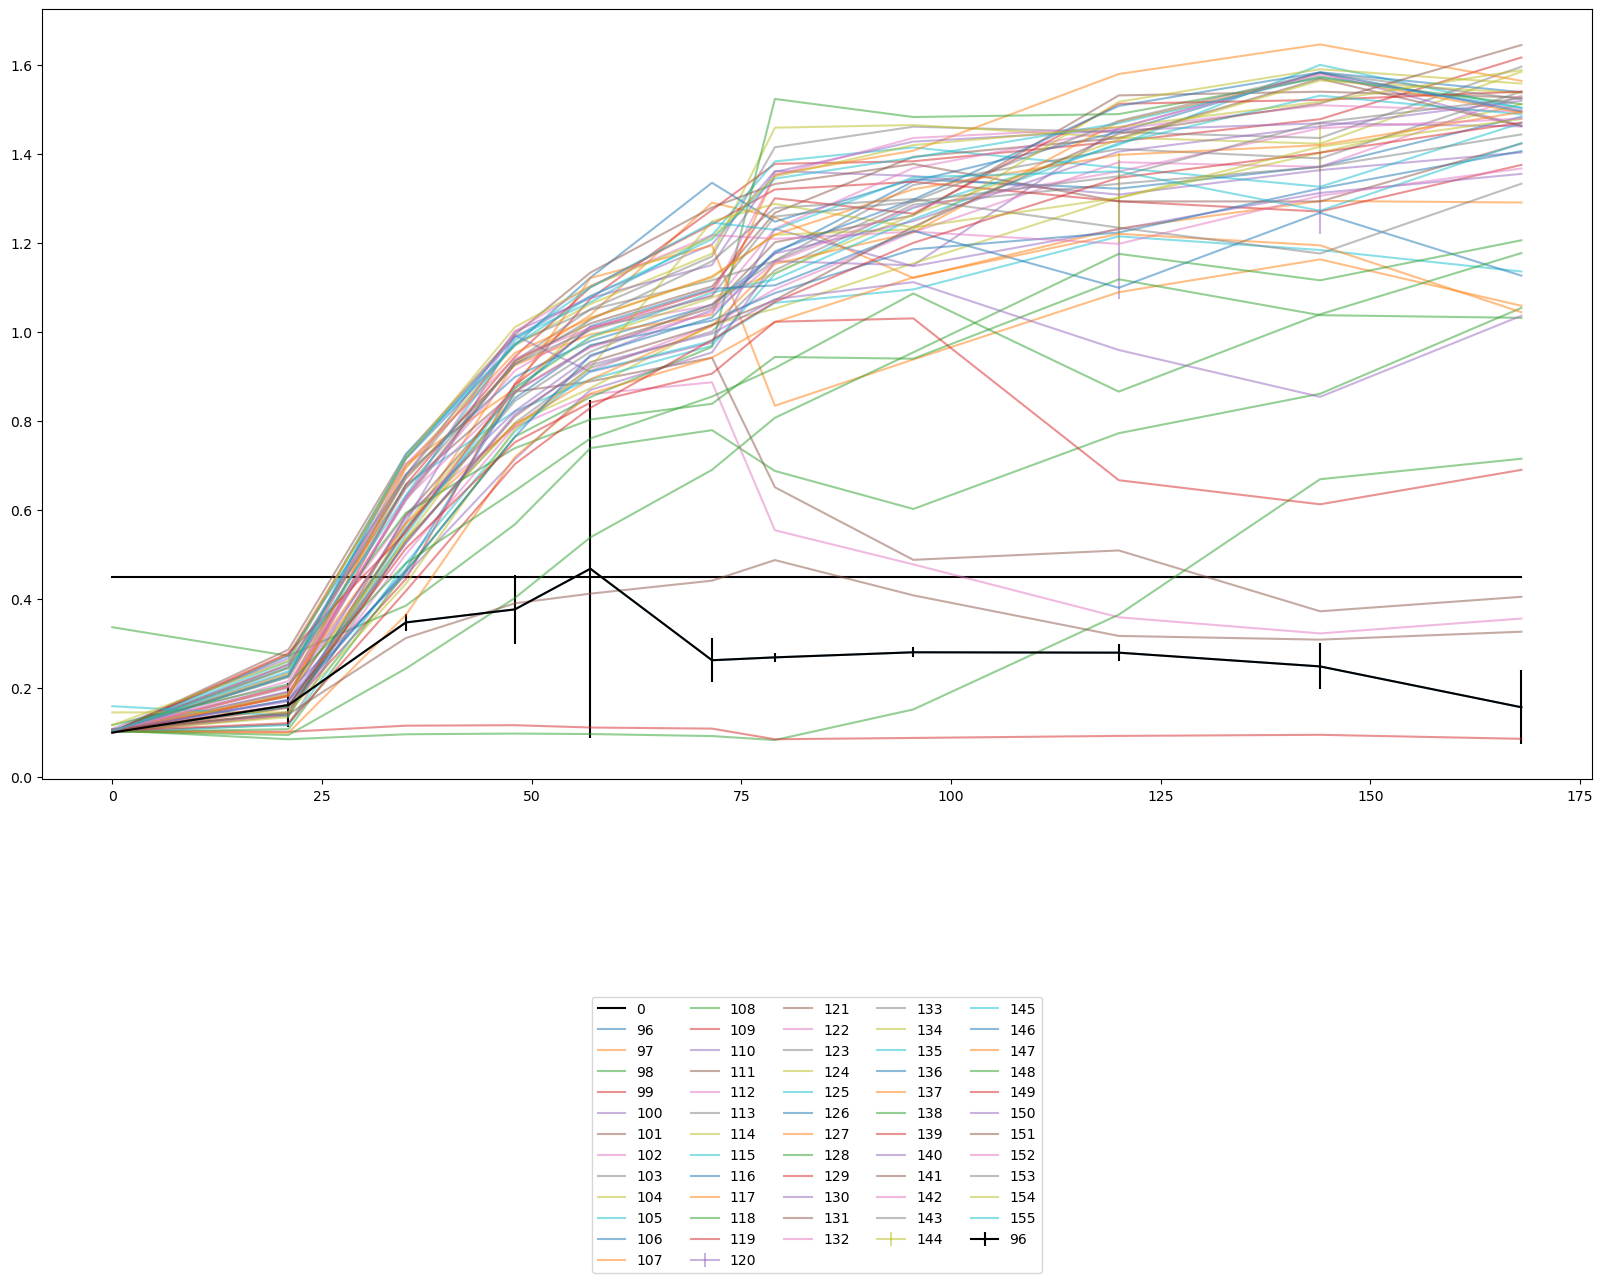

In [45]:

# must use 0:60 to avoid multiple 'Negative Control' wells from concating. 
concatenated_df = pd.concat([PlateE_590.astype(float).iloc[0:60], PlateF_590.astype(float).iloc[0:60], PlateD_590.astype(float).iloc[0:60]], axis=1)
x_590 = concatenated_df.groupby(level=0, axis=1).mean()
y_590 = concatenated_df.groupby(level=0, axis=1).std()

# Store data
x2 = x_590.copy()
y2 = y_590.copy()

# Set column names
x_590.columns = tp
y_590.columns = tp

# plot P sources first. 
# x_590 = x_590.loc[96:155]
# y_590 = y_590.loc[96:155]

# x_590 = x_590.iloc[0:60]
# x_590 = y_590.iloc[0:60]

ax = x_590.T.plot(legend=True, yerr=y_590, alpha=0.5, figsize=(20, 10))  # Use yerr=y_590 for error bars

# x_590.loc['Negative Control'].plot(ax=ax,color='k',yerr = y_590.loc['Negative Control'],legend=True)
x_590.loc[96].plot(ax=ax,color='k',yerr = y_590.loc[96],legend=True)

threshold = 0.45
x = pd.DataFrame([threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold])
x.index = tp
x.plot(ax=ax,color='k',legend=False)




ax.legend(ncol=5,bbox_to_anchor=(0.5, -0.65), loc='lower center')
# x.T.plot(legend=True,yerr = y,alpha=0.5,figsize=(20,10))


/var/folders/kn/zzns_smn1q79xdnf1tgqk__r0000gn/T/ipykernel_25661/2732280969.py:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y_750 = concatenated_df.groupby(level=0, axis=1).std()


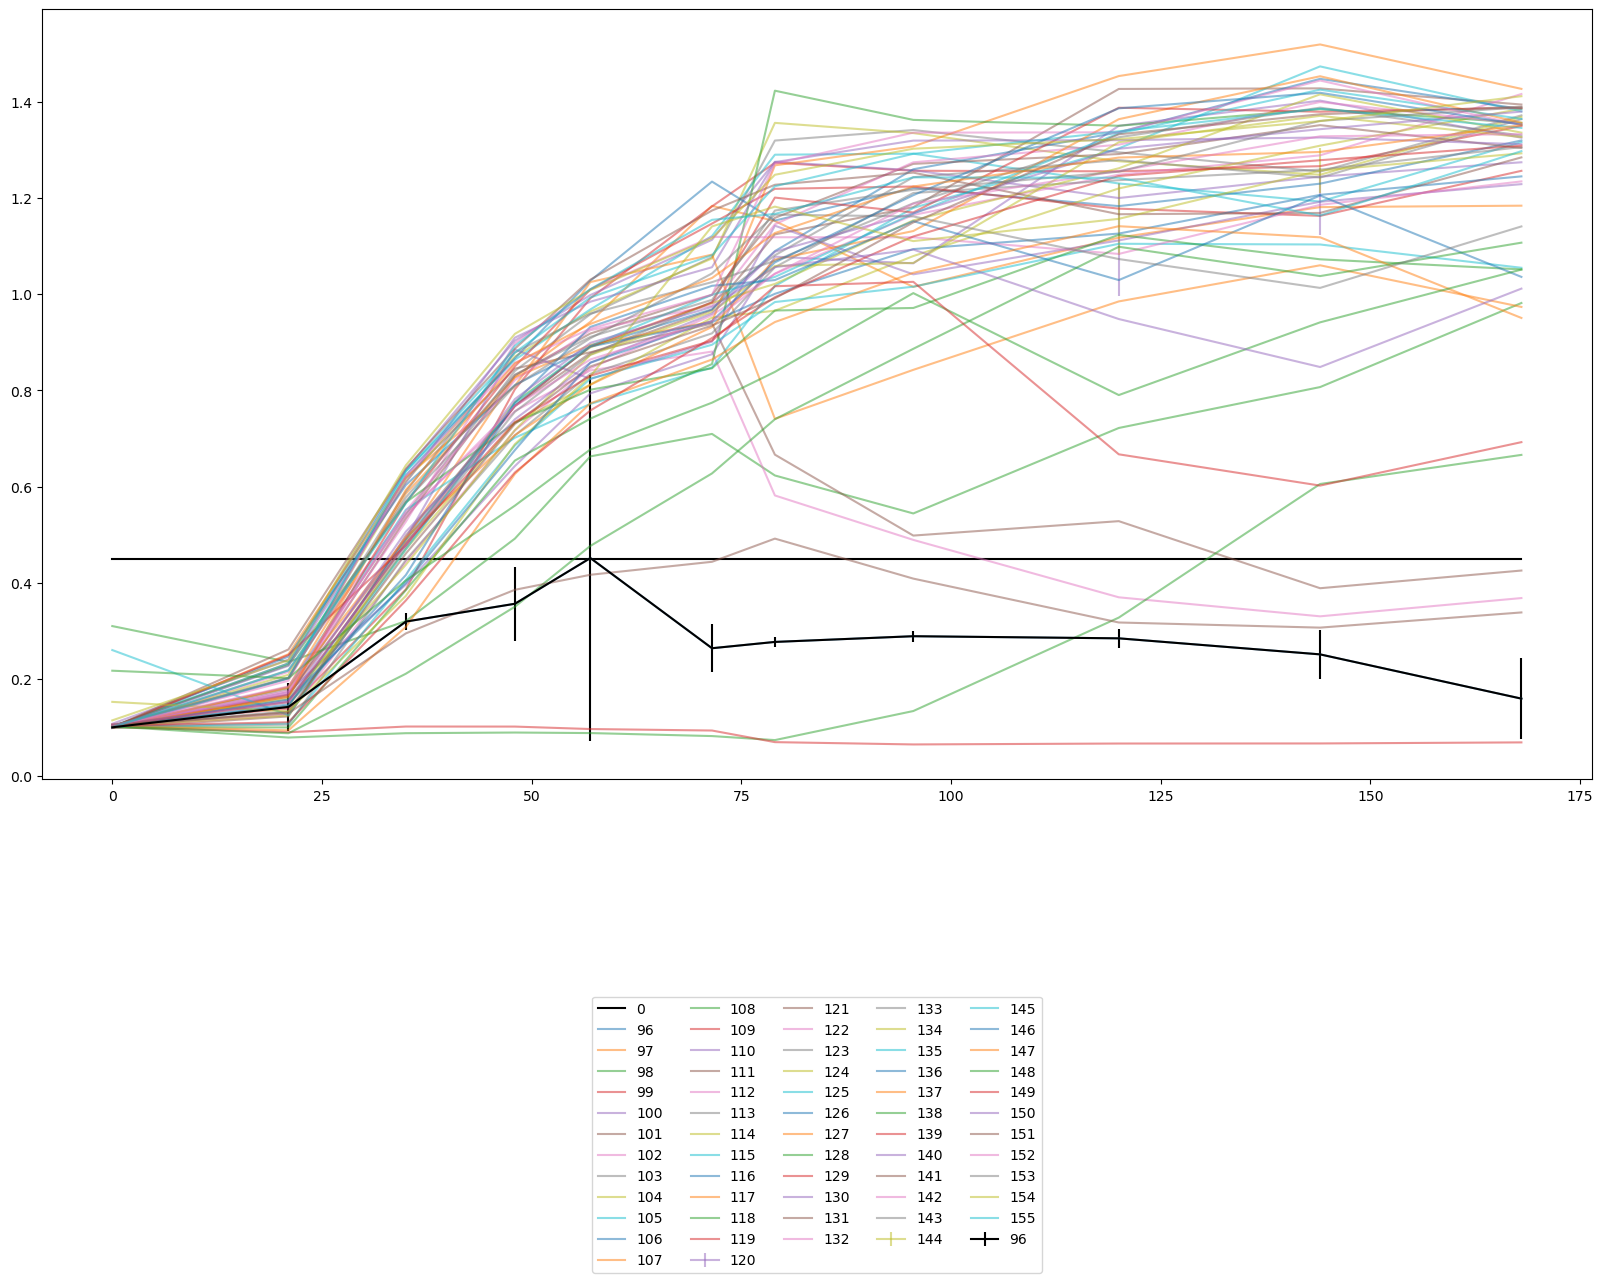

In [46]:
# for df in [PlateA_590,PlateB_590,PlateC_590]:
#     df = df.astype(float)
#     df.T.plot(legend=False)

# must use 0:60 to avoid multiple 'Negative Control' wells from concating. 
concatenated_df = pd.concat([PlateE_750.astype(float).iloc[0:60], PlateF_750.astype(float).iloc[0:60], PlateD_750.astype(float).iloc[0:60]], axis=1)
x_750 = concatenated_df.groupby(level=0, axis=1).mean()
y_750 = concatenated_df.groupby(level=0, axis=1).std()

# Store data
x2 = x_750.copy()
y2 = y_750.copy()

# Set column names
x_750.columns = tp
y_750.columns = tp

# plot P sources first. 
# x_590 = x_590.loc[96:155]
# y_590 = y_590.loc[96:155]

# x_590 = x_590.iloc[0:60]
# x_590 = y_590.iloc[0:60]

ax = x_750.T.plot(legend=True, yerr=y_750, alpha=0.5, figsize=(20, 10))  # Use yerr=y_590 for error bars

# x_750.loc['Negative Control'].plot(ax=ax,color='k',yerr = y_590.loc['Negative Control'],legend=True)
x_750.loc[96].plot(ax=ax,color='k',yerr = y_590.loc[96],legend=True)

threshold = 0.45
x = pd.DataFrame([threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold])
x.index = tp
x.plot(ax=ax,color='k',legend=False)




ax.legend(ncol=5,bbox_to_anchor=(0.5, -0.65), loc='lower center')
# x.T.plot(legend=True,yerr = y,alpha=0.5,figsize=(20,10))


In [47]:
tp

[0, 21, 35, 48, 57, 71.5, 79, 95.5, 120, 144, 168]

#### lets look at the highest the individual wells got in each plate. 

There appears to be an outlier at 57 h in Plate E readings. will not consider that for thresholds. 

In [48]:
# 750 nm wavelength.
print(PlateD_750.loc[96],PlateE_750.loc[96],PlateF_750.loc[96])

0      0.099
1     0.1136
2     0.3305
3     0.2731
4     0.2304
5     0.2206
6     0.2698
7     0.2827
8      0.267
9     0.1975
10    0.0655
Name: 96, dtype: object 0     0.0998
1     0.1218
2     0.2964
3     0.3832
4     0.8513
5     0.3116
6     0.2895
7     0.3035
8     0.3053
9     0.2967
10    0.2373
Name: 96, dtype: object 0     0.1024
1     0.1926
2     0.3331
3     0.4147
4     0.2741
5     0.2617
6     0.2739
7     0.2826
8     0.2833
9     0.2614
10    0.1771
Name: 96, dtype: object


In [49]:
# 590 nm wavelength. 
print(PlateD_590.loc[96],PlateE_590.loc[96],PlateF_590.loc[96])

0     0.0993
1     0.1238
2     0.3459
3     0.2884
4     0.2253
5     0.2178
6     0.2591
7     0.2724
8     0.2591
9     0.1908
10    0.0638
Name: 96, dtype: object 0     0.0999
1     0.1418
2     0.3293
3     0.4101
4     0.9057
5     0.3152
6     0.2784
7     0.2931
8     0.2987
9     0.2909
10     0.226
Name: 96, dtype: object 0     0.0998
1     0.2185
2     0.3656
3     0.4304
4     0.2719
5     0.2532
6      0.268
7     0.2743
8     0.2794
9     0.2628
10    0.1795
Name: 96, dtype: object


750 reached about 0.42, 590 reached about 0.43.

Will use 0.45 as threshold. 

These were reached by the 6th time point, ~ 95.5 h. 

In [50]:
tp[7]

95.5

In [51]:
# x.loc['Negative Control'].plot(ax=ax,color='k',yerr = y.loc['Negative Control'],legend=True)
x_590.columns = tp
x_750.columns = tp

In [52]:
x_590.loc[96]

0.0      0.099667
21.0     0.161367
35.0     0.346933
48.0     0.376300
57.0     0.467633
71.5     0.262067
79.0     0.268500
95.5     0.279933
120.0    0.279067
144.0    0.248167
168.0    0.156433
Name: 96, dtype: float64

In [53]:
y_590.columns = tp
y_750.columns = tp

In [54]:
temp_750 = x_750.copy()
temp_590 = x_590.copy()

In [55]:
temp_750['source']=temp_750.index

In [56]:
temp_750['source']=temp_750.index
temp_750.index = plate_well[96:156]
temp_750['well_sources'] = well_sources[96:156]
temp_590['source']=temp_590.index
temp_590.index = plate_well[96:156]
temp_590['well_sources'] = well_sources[96:156]

In [57]:
temp_750.T

PM4A_A1    PM4A_A2        PM4A_A3           PM4A_A4  \
0.0                     0.1004   0.099467       0.310633          0.106833   
21.0                  0.142667   0.167267       0.236267          0.139167   
35.0                      0.32      0.491       0.321033          0.386867   
48.0                     0.357   0.827867         0.4923          0.802567   
57.0                  0.451933     0.9425       0.663133            0.9915   
71.5                  0.264633     1.1834       0.709767          1.182367   
79.0                  0.277733     1.1519       0.623433          1.272933   
95.5                    0.2896   1.015133       0.544567          1.256367   
120.0                   0.2852   1.117467         0.7221          1.255133   
144.0                 0.251867   1.180833       0.807067            1.2659   
168.0                 0.159967     1.1838       0.981667            1.3492   
source                      96         97             98                99   
well_sources  Negative Control  Phosphate  Pyrophosphate  Trimetaphosphate   

                       PM4A_A5             PM4A_A6        PM4A_A7  \
0.0                   0.107767              0.1009         0.0992   
21.0                  0.241233              0.2334       0.215633   
35.0                  0.635467            0.617567       0.544967   
48.0                  0.903533            0.845467       0.757267   
57.0                    0.9982            0.879433         0.8416   
71.5                  1.112967            0.939167       0.880833   
79.0                     1.275              0.6667       0.581933   
95.5                  1.257333            0.498633       0.489667   
120.0                   1.1997            0.528567         0.3704   
144.0                 1.244067            0.389267         0.3309   
168.0                 1.273967               0.426       0.368833   
source                     100                 101            102   
well_sources  Tripolyphosphate  Triethyl Phosphate  Hypophosphite   

                                   PM4A_A8                       PM4A_A9  \
0.0                               0.101267                      0.100767   
21.0                              0.179433                        0.2095   
35.0                                0.5426                      0.610767   
48.0                                0.8406                      0.870667   
57.0                              0.958367                      0.963867   
71.5                              1.076833                      1.074233   
79.0                              1.319067                        1.3558   
95.5                              1.340933                      1.334567   
120.0                             1.294733                      1.276067   
144.0                             1.254633                         1.248   
168.0                             1.371367                        1.3682   
source                                 103                           104   
well_sources  Adenosine- 2’- monophosphate  Adenosine- 3’- monophosphate   

                                  PM4A_A10  ...          PM4A_E3  \
0.0                               0.102667  ...         0.101733   
21.0                                0.2328  ...           0.1582   
35.0                              0.632933  ...           0.4003   
48.0                                0.8638  ...           0.6761   
57.0                              0.968333  ...           0.8578   
71.5                              1.120733  ...         0.944433   
79.0                                1.2897  ...         1.066033   
95.5                              1.291867  ...         1.205633   
120.0                             1.229933  ...            1.386   
144.0                             1.192367  ...         1.418367   
168.0                             1.315767  ...           1.3519   
source                                 105  ...              146   
well_sources  

#### obtain data above the thresholds. 

In [58]:
# drop late datapoints. 

x2_590 = x_590.drop(columns=[95.5,120,144,168])
x2_750 = x_750.drop(columns=[95.5,120,144,168])

# y2 = y.drop(columns=[120,144,168])

obtain data above thresholds. Ensure that it is more than one datapoint. 

In [59]:
index_590 = x2_590.gt(0.45).sum(axis=1)>1
index_750 = x2_750.gt(0.45).sum(axis=1)>1
# index.to_csv('Biolog_gt_35_TF_numericalIndex.csv')

same number of carbon sources are returned. However, there are some differences in the 590 nm and 750 nm data. 

In [60]:
index_590.sum()

56

In [61]:
index_750.sum()

56

In [62]:
# 60 values matched, thus the 590 and 750 nm data was consistent for the P conditions.
(index_750==index_590).sum()

60

In [63]:
# the indeces of the non-matching wells.
ind = index_750[index_750!=index_590]

In [64]:
ind.index.values

array([], dtype=int64)

In [65]:
index_590[ind.index.values]

Series([], dtype: bool)

In [66]:
index_750[ind.index.values]

Series([], dtype: bool)

In [67]:
# the negative control 590.
temp_590.iloc[0]

0.0                     0.099667
21.0                    0.161367
35.0                    0.346933
48.0                      0.3763
57.0                    0.467633
71.5                    0.262067
79.0                      0.2685
95.5                    0.279933
120.0                   0.279067
144.0                   0.248167
168.0                   0.156433
source                        96
well_sources    Negative Control
Name: PM4A_A1, dtype: object

In [68]:
temp_750.iloc[0]

0.0                       0.1004
21.0                    0.142667
35.0                        0.32
48.0                       0.357
57.0                    0.451933
71.5                    0.264633
79.0                    0.277733
95.5                      0.2896
120.0                     0.2852
144.0                   0.251867
168.0                   0.159967
source                        96
well_sources    Negative Control
Name: PM4A_A1, dtype: object

In [69]:
# new index set these to false
final_TF_values = index_750.copy()
final_TF_values[index_750!=index_590] = False

In [70]:
# final_TF_values

In [71]:
temp_750['growth'] = final_TF_values.values

#### saved dataframe.

In [72]:
temp_750

0.0      21.0      35.0      48.0      57.0      71.5  \
PM4A_A1   0.100400  0.142667  0.320000  0.357000  0.451933  0.264633   
PM4A_A2   0.099467  0.167267  0.491000  0.827867  0.942500  1.183400   
PM4A_A3   0.310633  0.236267  0.321033  0.492300  0.663133  0.709767   
PM4A_A4   0.106833  0.139167  0.386867  0.802567  0.991500  1.182367   
PM4A_A5   0.107767  0.241233  0.635467  0.903533  0.998200  1.112967   
PM4A_A6   0.100900  0.233400  0.617567  0.845467  0.879433  0.939167   
PM4A_A7   0.099200  0.215633  0.544967  0.757267  0.841600  0.880833   
PM4A_A8   0.101267  0.179433  0.542600  0.840600  0.958367  1.076833   
PM4A_A9   0.100767  0.209500  0.610767  0.870667  0.963867  1.074233   
PM4A_A10  0.102667  0.232800  0.632933  0.863800  0.968333  1.120733   
PM4A_A11  0.099133  0.201967  0.624033  0.867100  1.028000  1.233833   
PM4A_A12  0.099333  0.252267  0.619833  0.809533  1.025200  1.082167   
PM4A_B1   0.102267  0.079133  0.088167  0.089533  0.088433  0.082200   
PM4A_B2   0.101067  0.090167  0.102000  0.101900  0.096800  0.093700   
PM4A_B3   0.100067  0.173833  0.396733  0.643033  0.793967  0.875233   
PM4A_B4   0.099100  0.122967  0.498733  0.767533  0.877767  0.967200   
PM4A_B5   0.099300  0.127000  0.444167  0.717067  0.846167  0.956267   
PM4A_B6   0.101100  0.105867  0.448067  0.706700  0.834567  0.918700   
PM4A_B7   0.101200  0.144467  0.470433  0.733133  0.812267  0.951267   
PM4A_B8   0.101833  0.183233  0.552267  0.701867  0.772100  0.847700   
PM4A_B9   0.100000  0.247400  0.603600  0.811433  0.891033  0.968433   
PM4A_B10  0.099967  0.184333  0.585767  0.827033  0.894700  0.943000   
PM4A_B11  0.100000  0.100200  0.385400  0.654433  0.741500  0.854867   
PM4A_B12  0.100033  0.168567  0.567100  0.850067  1.009767  1.146667   
PM4A_C1   0.103133  0.168833  0.492967  0.885267  0.823867  0.901333   
PM4A_C2   0.099633  0.164100  0.534300  0.831733  0.918300  0.998700   
PM4A_C3   0.100200  0.172067  0.549633  0.821667  0.925167  0.976333   
PM4A_C4   0.103600  0.133467  0.475000  0.755667  0.874467  0.983600   
PM4A_C5   0.102467  0.124900  0.485167  0.775933  0.889567  0.981667   
PM4A_C6   0.101233  0.108533  0.406300  0.685800  0.824500  0.894967   
PM4A_C7   0.102233  0.144767  0.490267  0.768800  0.891233  0.941833   
PM4A_C8   0.102233  0.182433  0.494133  0.707233  0.811900  0.931900   
PM4A_C9   0.101933  0.229667  0.567700  0.733033  0.801600  0.846067   
PM4A_C10  0.100833  0.250633  0.477933  0.767667  0.892167  0.982667   
PM4A_C11  0.100733  0.228167  0.608933  0.909733  0.984400  1.056000   
PM4A_C12  0.100033  0.262033  0.637500  0.886767  1.030200  1.173767   
PM4A_D1   0.103133  0.176200  0.527467  0.897933  1.009867  1.118967   
PM4A_D2   0.103300  0.202200  0.590033  0.878767  0.959733  1.024967   
PM4A_D3   0.101367  0.160200  0.438000  0.717567  0.873933  0.963233   
PM4A_D4   0.260833  0.125767  0.470033  0.773967  0.892633  0.998700   
PM4A_D5   0.101767  0.148067  0.416700  0.775200  0.931967  1.017433   
PM4A_D6   0.103100  0.094067  0.308800  0.626633  0.773300  0.864267   
PM4A_D7   0.101933  0.088100  0.211700  0.350867  0.477167  0.627733   
PM4A_D8   0.103500  0.110933  0.363867  0.629700  0.758467  0.908900   
PM4A_D9   0.103833  0.155767  0.506800  0.740167  0.857700  0.959833   
PM4A_D10  0.101000  0.132167  0.461367  0.730367  0.849867  0.934900   
PM4A_D11  0.101167  0.197200  0.622167  0.857700  0.928333  0.998800   
PM4A_D12  0.099333  0.219200  0.570633  0.809400  0.908467  1.043033   
PM4A_E1   0.153200  0.133433  0.373333  0.688533  0.829600  1.140733   
PM4A_E2   0.101600  0.202867  0.631767  0.878767  0.993133  1.081033   
PM4A_E3   0.101733  0.158200  0.400300  0.676100  0.857800  0.944433   
PM4A_E4   0.101967  0.163900  0.593633  0.856133  0.938200  1.033600   
PM4A_E5   0.217967  0.202400  0.405300  0.560800  0.677567  0.774633   
PM4A_E6   0.103733  0.152667  0.482700  0.734367  0.830667  0.903400   
PM4A_E7   0.104900  0.153367  0.480633  0.782133  0.898

In [73]:
# temp_750.to_csv('plate_4A_P_growth_output_750nmData.csv')

### Plot Sulfur sources.

/var/folders/kn/zzns_smn1q79xdnf1tgqk__r0000gn/T/ipykernel_25661/3802050991.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y_590 = concatenated_df.groupby(level=0, axis=1).std()


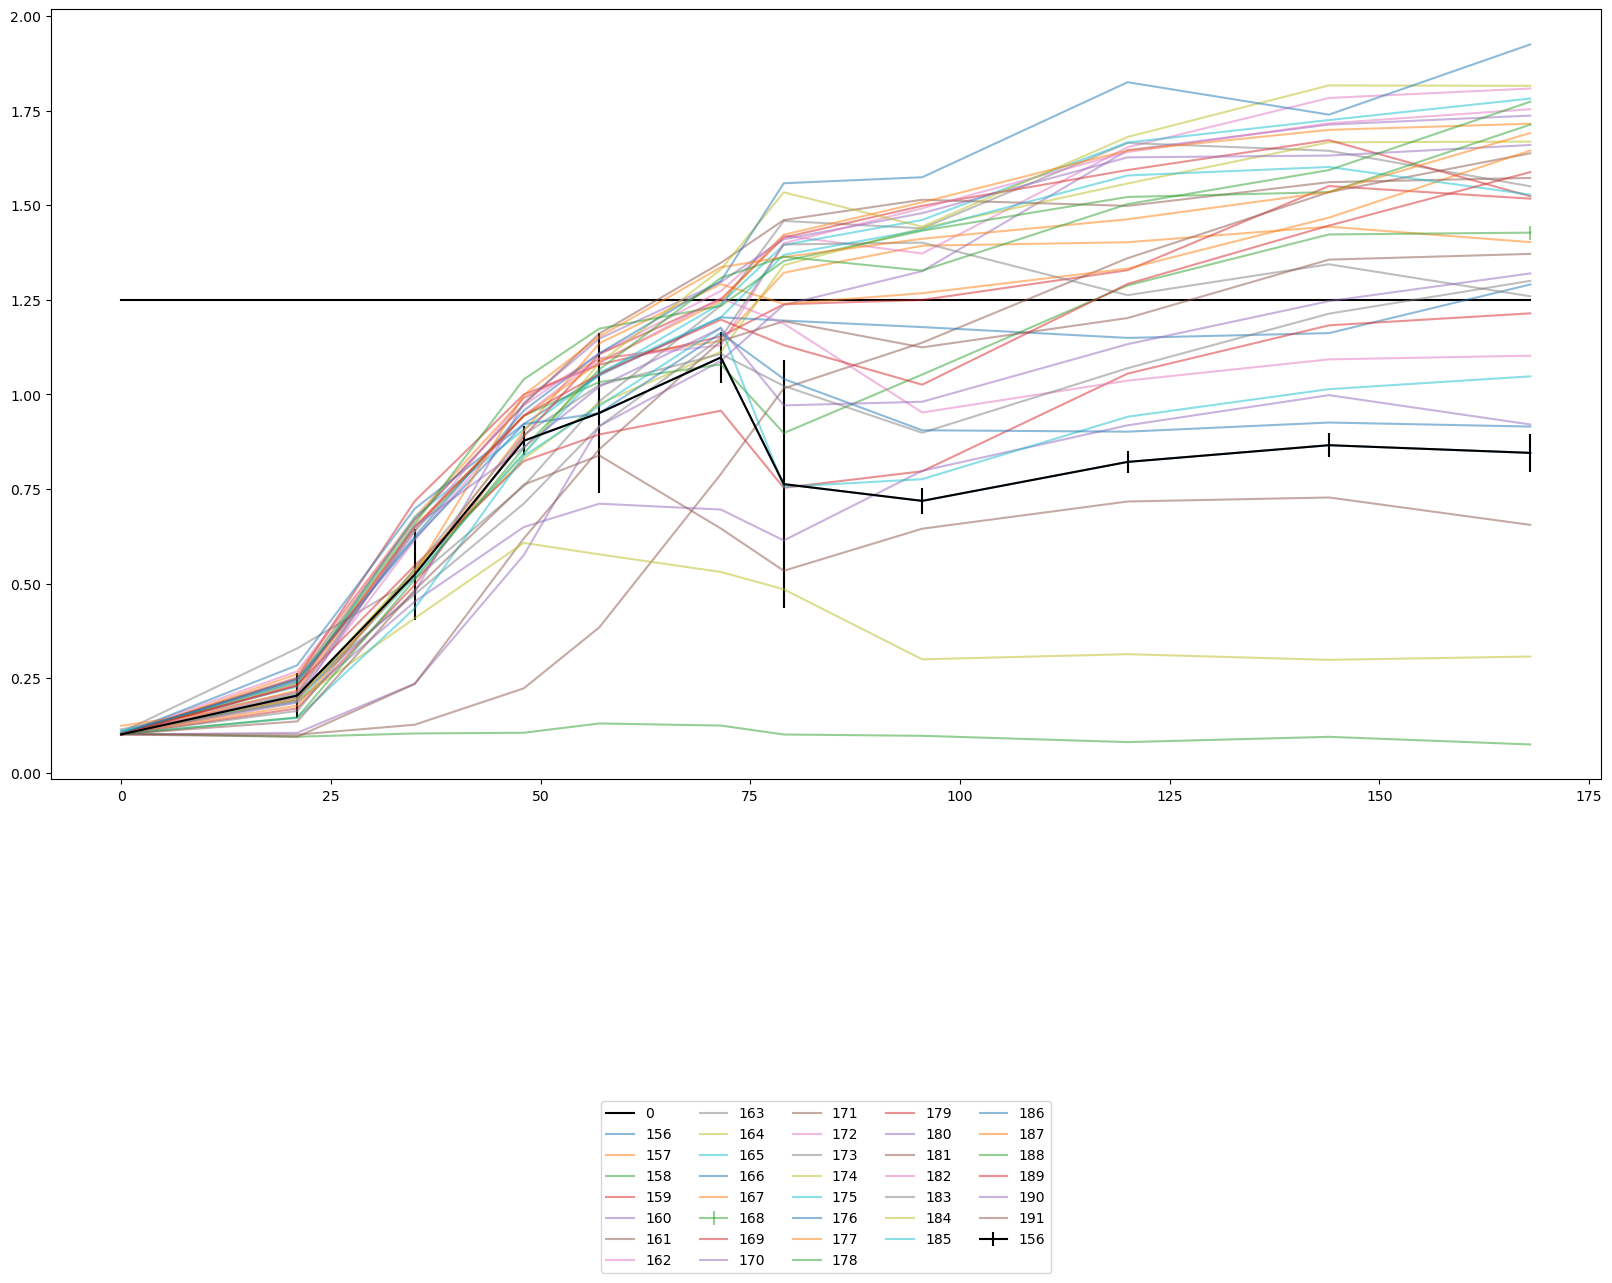

In [74]:
# plot S sources. 590 nm.

concatenated_df = pd.concat([PlateE_590.astype(float)[60:], PlateF_590.astype(float)[60:], PlateD_590.astype(float)[60:]], axis=1)
x_590 = concatenated_df.groupby(level=0, axis=1).mean()
y_590 = concatenated_df.groupby(level=0, axis=1).std()
    
# x_590 = pd.concat([PlateD_590.astype(float), PlateE_590.astype(float), PlateF_590.astype(float)]).groupby(level=0).mean()
# y_590 = pd.concat([PlateD_590.astype(float), PlateE_590.astype(float), PlateF_590.astype(float)]).groupby(level=0).std()

# plot P sources first. 
# x_590 = x_590.loc[156:]
# y_590 = y_590.loc[156:]




x_590.columns = tp
y_590.columns = tp


ax = x_590.T.plot(legend=True,yerr = y_590,alpha=0.5,figsize=(20,10))

# x_590.columns = tp
# y_590.columns = tp


# x_590.loc['Negative Control'].plot(ax=ax,color='k',yerr = y_590.loc['Negative Control'],legend=True)
x_590.loc[156].plot(color='k',yerr = y_590.loc[156],legend=True)

threshold = 1.25
x = pd.DataFrame([threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold])
x.index = tp
x.plot(ax=ax,color='k',legend=False)


ax.legend(ncol=5,bbox_to_anchor=(0.5, -0.65), loc='lower center')
# x.T.plot(legend=True,yerr = y,alpha=0.5,figsize=(20,10))



/var/folders/kn/zzns_smn1q79xdnf1tgqk__r0000gn/T/ipykernel_25661/265197547.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  y_750 = concatenated_df.groupby(level=0, axis=1).std()


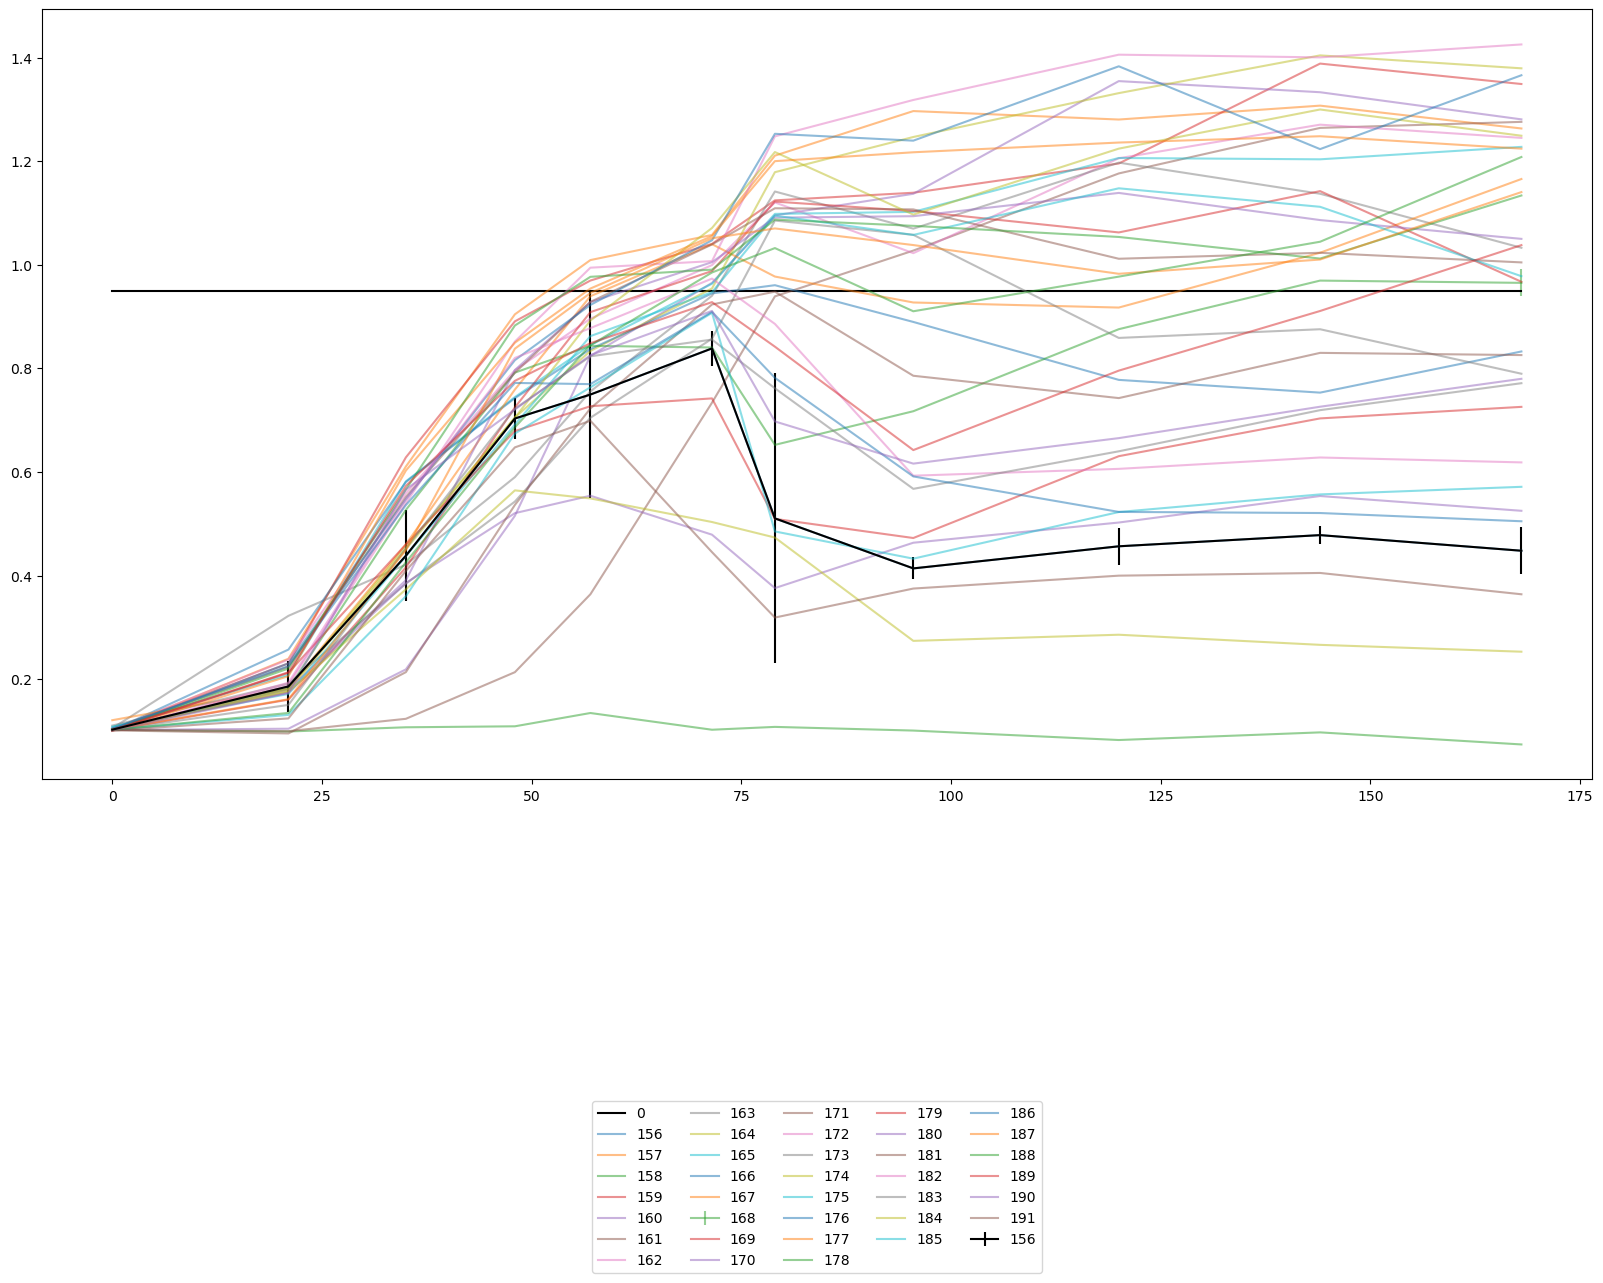

In [75]:
# plot S sources. 

concatenated_df = pd.concat([PlateE_750.astype(float)[60:], PlateF_750.astype(float)[60:], PlateD_750.astype(float)[60:]], axis=1)
x_750 = concatenated_df.groupby(level=0, axis=1).mean()
y_750 = concatenated_df.groupby(level=0, axis=1).std()
    
    
# x_750 = pd.concat([PlateD_750.astype(float), PlateE_750.astype(float), PlateF_750.astype(float)]).groupby(level=0).mean()
# y_750 = pd.concat([PlateD_750.astype(float), PlateE_750.astype(float), PlateF_750.astype(float)]).groupby(level=0).std()


x_750.columns = tp
y_750.columns = tp

# plot P sources first. 
# x_750 = x_750.loc[156:]
# y_750 = y_750.loc[156:]
ax = x_750.T.plot(legend=True,yerr = y_750,alpha=0.5,figsize=(20,10))

# x_750.loc['Negative Control'].plot(ax=ax,color='k',yerr = y_750.loc['Negative Control'],legend=True)
x_750.loc[156].plot(color='k',yerr = y_750.loc[156],legend=True)


threshold = 0.95
x = pd.DataFrame([threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold,threshold])
x.index = tp
x.plot(ax=ax,color='k',legend=False)


ax.legend(ncol=5,bbox_to_anchor=(0.5, -0.65), loc='lower center')
# x.T.plot(legend=True,yerr = y,alpha=0.5,figsize=(20,10))
# plt.show()


750 S

In [76]:
x_750.loc[156]

0.0      0.102433
21.0     0.185933
35.0     0.438233
48.0     0.703267
57.0     0.749533
71.5     0.838633
79.0     0.510400
95.5     0.413833
120.0    0.456500
144.0    0.478100
168.0    0.447933
Name: 156, dtype: float64

In [77]:
x_590.loc[156]

0.0      0.101767
21.0     0.204467
35.0     0.524400
48.0     0.877667
57.0     0.951067
71.5     1.097933
79.0     0.763133
95.5     0.718833
120.0    0.821833
144.0    0.865967
168.0    0.845700
Name: 156, dtype: float64

In [78]:
x_750.T

156       157       158       159       160       161       162  \
0.0    0.102433  0.100933  0.102067  0.103133  0.101900  0.102067  0.103067   
21.0   0.185933  0.239433  0.098867  0.230433  0.104233  0.099533  0.237733   
35.0   0.438233  0.610500  0.107000  0.628167  0.218800  0.123367  0.558633   
48.0   0.703267  0.904467  0.108900  0.890900  0.515400  0.213400  0.796567   
57.0   0.749533  1.009233  0.134567  0.969700  0.824200  0.363833  0.895967   
71.5   0.838633  1.057733  0.102267  1.040500  0.965267  0.733833  0.999567   
79.0   0.510400  1.210900  0.107767  1.124533  1.095533  0.939133  1.120567   
95.5   0.413833  1.296967  0.100667  1.139267  1.137233  1.027567  1.022567   
120.0  0.456500  1.280633  0.082400  1.195733  1.354833  1.176533  1.205833   
144.0  0.478100  1.307467  0.097167  1.388667  1.333367  1.264467  1.270733   
168.0  0.447933  1.263367  0.073867  1.349233  1.280967  1.276133  1.245200   

            163       164       165  ...       182       183       184  \
0.0    0.105100  0.103033  0.106967  ...  0.100467  0.101433  0.102000   
21.0   0.322233  0.176867  0.208400  ...  0.193033  0.150200  0.176067   
35.0   0.421067  0.450867  0.581967  ...  0.547700  0.452467  0.373233   
48.0   0.590067  0.705333  0.744700  ...  0.820267  0.722167  0.564500   
57.0   0.755467  0.833700  0.845033  ...  0.877833  0.823400  0.548933   
71.5   0.940333  0.954400  0.963533  ...  0.973433  0.855700  0.503400   
79.0   1.141633  1.178967  1.098433  ...  0.885933  0.761600  0.473400   
95.5   1.069900  1.246900  1.102300  ...  0.592833  0.567433  0.273900   
120.0  1.197400  1.331633  1.206367  ...  0.606033  0.639933  0.285733   
144.0  1.137300  1.404500  1.203800  ...  0.628000  0.719400  0.266200   
168.0  1.033000  1.379533  1.227833  ...  0.618533  0.771467  0.252967   

            185       186       187       188       189       190       191  
0.0    0.102133  0.104167  0.102633  0.101867  0.101600  0.101267  0.100633  
21.0   0.130933  0.225233  0.161267  0.134667  0.213267  0.173233  0.124133  
35.0   0.360100  0.536133  0.449100  0.425567  0.573200  0.566233  0.409100  
48.0   0.674233  0.772000  0.838133  0.686200  0.776067  0.720700  0.647533  
57.0   0.763567  0.769667  0.945600  0.844767  0.848700  0.825467  0.698933  
71.5   0.907367  0.909267  1.051300  0.985267  0.928067  0.911033  0.445233  
79.0   0.485200  0.781800  1.070333  1.032400  0.842000  0.697600  0.318900  
95.5   0.432633  0.591433  1.038233  0.910367  0.642300  0.616167  0.374900  
120.0  0.522700  0.522900  0.982733  0.977267  0.795733  0.665400  0.399800  
144.0  0.556733  0.520767  1.010267  1.044633  0.910900  0.726033  0.405033  
168.0  0.571367  0.504867  1.140500  1.208267  1.038100  0.779933  0.363867  

[11 rows x 36 columns]

In [79]:
tp

[0, 21, 35, 48, 57, 71.5, 79, 95.5, 120, 144, 168]

#### lets look at the highest the individual wells got in each plate. 

There appears to be an outlier at 57 h in Plate E readings. will not consider that for thresholds. 

In [80]:
# 750 nm wavelength.
print(PlateD_750.loc[156],PlateE_750.loc[156],PlateF_750.loc[156])

0     0.1051
1     0.1525
2     0.3765
3     0.7081
4     0.8809
5     0.8402
6     0.3215
7     0.3924
8     0.4294
9     0.4964
10    0.5003
Name: 156, dtype: object 0     0.0986
1     0.1627
2     0.3991
3     0.6624
4      0.848
5     0.8721
6     0.8323
7     0.4141
8      0.443
9     0.4753
10    0.4274
Name: 156, dtype: object 0     0.1036
1     0.2426
2     0.5391
3     0.7393
4     0.5197
5     0.8036
6     0.3774
7      0.435
8     0.4971
9     0.4626
10    0.4161
Name: 156, dtype: object


In [81]:
# 590 nm wavelength. 
print(PlateD_590.loc[156],PlateE_590.loc[156],PlateF_590.loc[156])

0     0.1029
1     0.1595
2     0.4131
3     0.8392
4     1.0551
5     1.0705
6      0.543
7     0.6821
8     0.7897
9     0.8854
10    0.8967
Name: 156, dtype: object 0     0.1013
1      0.183
2     0.5091
3     0.8773
4     1.0914
5      1.174
6      1.139
7     0.7503
8     0.8309
9     0.8825
10    0.8452
Name: 156, dtype: object 0     0.1011
1     0.2709
2      0.651
3     0.9165
4     0.7067
5     1.0493
6     0.6074
7     0.7241
8     0.8449
9       0.83
10    0.7952
Name: 156, dtype: object


750 reached about .88, 590 reached about 1.17.

Will use 0.95 as 750 threshold, 1.25 as 590 threshold.

These were reached by the 6th time point, ~120 h. 

In [82]:
tp[8]

120

In [83]:
# # x.loc['Negative Control'].plot(ax=ax,color='k',yerr = y.loc['Negative Control'],legend=True)
# x_590.columns = tp
# x_750.columns = tp

In [84]:
x_590.loc[156]

0.0      0.101767
21.0     0.204467
35.0     0.524400
48.0     0.877667
57.0     0.951067
71.5     1.097933
79.0     0.763133
95.5     0.718833
120.0    0.821833
144.0    0.865967
168.0    0.845700
Name: 156, dtype: float64

In [85]:
y_590.columns = tp
y_750.columns = tp

In [86]:
temp_750 = x_750.copy()
temp_590 = x_590.copy()

In [87]:
temp_750['source']=temp_750.index

In [88]:
temp_750['source']=temp_750.index
temp_750.index = plate_well[156:]
temp_750['well_sources'] = well_sources[156:]
temp_590['source']=temp_590.index
temp_590.index = plate_well[156:]
temp_590['well_sources'] = well_sources[156:]

In [89]:
temp_750.T

PM4A_F1   PM4A_F2      PM4A_F3        PM4A_F4  \
0.0                   0.102433  0.100933     0.102067       0.103133   
21.0                  0.185933  0.239433     0.098867       0.230433   
35.0                  0.438233    0.6105        0.107       0.628167   
48.0                  0.703267  0.904467       0.1089         0.8909   
57.0                  0.749533  1.009233     0.134567         0.9697   
71.5                  0.838633  1.057733     0.102267         1.0405   
79.0                    0.5104    1.2109     0.107767       1.124533   
95.5                  0.413833  1.296967     0.100667       1.139267   
120.0                   0.4565  1.280633       0.0824       1.195733   
144.0                   0.4781  1.307467     0.097167       1.388667   
168.0                 0.447933  1.263367     0.073867       1.349233   
source                     156       157          158            159   
well_sources  Negative Control   Sulfate  Thiosulfate  Tetrathionate   

                    PM4A_F5          PM4A_F6     PM4A_F7     PM4A_F8  \
0.0                  0.1019         0.102067    0.103067      0.1051   
21.0               0.104233         0.099533    0.237733    0.322233   
35.0                 0.2188         0.123367    0.558633    0.421067   
48.0                 0.5154           0.2134    0.796567    0.590067   
57.0                 0.8242         0.363833    0.895967    0.755467   
71.5               0.965267         0.733833    0.999567    0.940333   
79.0               1.095533         0.939133    1.120567    1.141633   
95.5               1.137233         1.027567    1.022567      1.0699   
120.0              1.354833         1.176533    1.205833      1.1974   
144.0              1.333367         1.264467    1.270733      1.1373   
168.0              1.280967         1.276133      1.2452       1.033   
source                  160              161         162         163   
well_sources  Thiophosphate  Dithiophosphate  L-Cysteine  D-Cysteine   

                         PM4A_F9        PM4A_F10  ...            PM4A_H3  \
0.0                     0.103033        0.106967  ...           0.100467   
21.0                    0.176867          0.2084  ...           0.193033   
35.0                    0.450867        0.581967  ...             0.5477   
48.0                    0.705333          0.7447  ...           0.820267   
57.0                      0.8337        0.845033  ...           0.877833   
71.5                      0.9544        0.963533  ...           0.973433   
79.0                    1.178967        1.098433  ...           0.885933   
95.5                      1.2469          1.1023  ...           0.592833   
120.0                   1.331633        1.206367  ...           0.606033   
144.0                     1.4045          1.2038  ...              0.628   
168.0                   1.379533        1.227833  ...           0.618533   
source                       164             165  ...                182   
well_sources  L-CysteinylGlycine  L-Cysteic Acid  ...  1-Thio-b-DGlucose   

                    PM4A_H4           PM4A_H5   PM4A_H6      PM4A_H7  \
0.0                0.101433             0.102  0.102133     0.104167   
21.0                 0.1502          0.176067  0.130933     0.225233   
35.0               0.452467          0.373233    0.3601     0.536133   
48.0               0.722167            0.5645  0.674233        0.772   
57.0                 0.8234          0.548933  0.763567     0.769667   
71.5                 0.8557            0.5034  0.907367     0.909267   
79.0                 0.7616            0.4734    0.4852       0.7818   
95.5               0.567433            0.2739  0.432633     0.591433   
120.0              0.639933          0.285733    0.5227       0.5229   
144.0                0.7194            0.2662  0.556733     0.520767   
168.0              0.771467          0.252967  0.571367     0.504867   
source                  183               184       185          186   
well

#### obtain data above the thresholds. 

In [90]:
x_590

0.0       21.0      35.0      48.0      57.0      71.5      79.0   \
156  0.101767  0.204467  0.524400  0.877667  0.951067  1.097933  0.763133   
157  0.100167  0.261333  0.675400  0.990667  1.092533  1.141800  1.321800   
158  0.103633  0.095633  0.104233  0.106100  0.130633  0.125100  0.101467   
159  0.102900  0.251833  0.718100  0.999900  1.078800  1.153200  1.238333   
160  0.101533  0.105933  0.235867  0.575433  0.916433  1.088567  1.236767   
161  0.102500  0.101033  0.127333  0.223467  0.384433  0.789900  1.016133   
162  0.104467  0.268500  0.670167  0.971067  1.108367  1.273433  1.419833   
163  0.107333  0.329233  0.512800  0.757800  0.981733  1.235100  1.458600   
164  0.103133  0.198333  0.536567  0.830100  0.975600  1.113033  1.341433   
165  0.109667  0.227833  0.676500  0.907300  1.051833  1.240300  1.395067   
166  0.101800  0.284533  0.698200  0.922333  1.050267  1.203767  1.195367   
167  0.124367  0.193333  0.523400  0.903133  1.135067  1.291633  1.239400   
168  0.102167  0.209333  0.639800  0.944033  1.032800  1.079267  0.898033   
169  0.101267  0.170500  0.496833  0.888867  1.106600  1.252000  1.414700   
170  0.102033  0.199400  0.477633  0.977900  1.147500  1.297067  1.410167   
171  0.103867  0.248367  0.668000  0.973633  1.160767  1.348100  1.461100   
172  0.102633  0.204133  0.615833  0.944600  1.096000  1.129733  1.399833   
173  0.114967  0.214433  0.471900  0.711600  0.915567  1.149400  1.396433   
174  0.102767  0.195067  0.535467  0.841633  1.083467  1.330267  1.534133   
175  0.111767  0.187833  0.518867  0.844767  1.058100  1.204067  1.368967   
176  0.101667  0.247300  0.624833  0.957433  1.108700  1.299767  1.558233   
177  0.100333  0.218533  0.651867  0.942800  1.085167  1.246433  1.422167   
178  0.102067  0.238633  0.658100  1.039900  1.173900  1.234000  1.352400   
179  0.102333  0.232933  0.547900  0.823900  0.894300  0.957167  0.753333   
180  0.102067  0.185833  0.452567  0.649733  0.711433  0.695933  0.614200   
181  0.101400  0.095700  0.234800  0.619333  0.855067  1.141267  1.193533   
182  0.101533  0.213067  0.638267  0.991700  1.083933  1.254500  1.187433   
183  0.102233  0.163767  0.539333  0.893700  1.024800  1.107100  1.022700   
184  0.102267  0.191433  0.408767  0.607867  0.577433  0.531000  0.485200   
185  0.102733  0.145400  0.435133  0.837333  0.969567  1.177000  0.756000   
186  0.105067  0.242700  0.619333  0.921633  0.950767  1.162400  1.041000   
187  0.103167  0.177733  0.528700  0.998700  1.152833  1.336167  1.363067   
188  0.101933  0.146700  0.510900  0.858600  1.065967  1.308100  1.364033   
189  0.102333  0.230567  0.648500  0.943467  1.054000  1.197700  1.130300   
190  0.102333  0.191567  0.651767  0.860767  1.020567  1.175200  0.971167   
191  0.102433  0.136100  0.483567  0.761733  0.838967  0.645800  0.534200   

        95.5      120.0     144.0     168.0  
156  0.718833  0.821833  0.865967  0.845700  
157  1.393200  1.402267  1.443467  1.402533  
158  0.098033  0.081367  0.095300  0.075200  
159  1.249900  1.328367  1.550733  1.517467  
160  1.325867  1.645667  1.713233  1.736967  
161  1.136933  1.360167  1.534700  1.637400  
162  1.372600  1.653467  1.783533  1.808467  
163  1.439067  1.664633  1.643967  1.550167  
164  1.439500  1.557633  1.666433  1.668233  
165  1.461233  1.665967  1.725200  1.782033  
166  1.178100  1.149500  1.162167  1.290667  
167  1.267600  1.332567  1.467333  1.644567  
168  1.052633  1.288300  1.422933  1.427700  
169  1.498600  1.593133  1.672200  1.523667  
170  1.479133  1.626633  1.631333  1.659300  
171  1.514600  1.498433  1.561100  1.572233  
172  1.492000  1.640800  1.716567  1.753800  
173  1.401367  1.262400  1.344067  1.259533  
174  1.443533  1.680567  1.816767  1.815633  
175  1.434867  1.578767  1.601200  1.528133  
176  1.574033  1.825167  1.739467  1.925000  
177  1.507900  1.644900  1.699233  1.715633  
178  1.432800  1.521967  1.534800  1.713100  
179  0.797067  1.055233  1.182733  1.214400  
180  0.7

In [91]:
x_750

0.0       21.0      35.0      48.0      57.0      71.5      79.0   \
156  0.102433  0.185933  0.438233  0.703267  0.749533  0.838633  0.510400   
157  0.100933  0.239433  0.610500  0.904467  1.009233  1.057733  1.210900   
158  0.102067  0.098867  0.107000  0.108900  0.134567  0.102267  0.107767   
159  0.103133  0.230433  0.628167  0.890900  0.969700  1.040500  1.124533   
160  0.101900  0.104233  0.218800  0.515400  0.824200  0.965267  1.095533   
161  0.102067  0.099533  0.123367  0.213400  0.363833  0.733833  0.939133   
162  0.103067  0.237733  0.558633  0.796567  0.895967  0.999567  1.120567   
163  0.105100  0.322233  0.421067  0.590067  0.755467  0.940333  1.141633   
164  0.103033  0.176867  0.450867  0.705333  0.833700  0.954400  1.178967   
165  0.106967  0.208400  0.581967  0.744700  0.845033  0.963533  1.098433   
166  0.101033  0.257033  0.580633  0.742567  0.837300  0.944833  0.960733   
167  0.120700  0.181833  0.460233  0.759267  0.939433  1.039933  0.977400   
168  0.103533  0.181500  0.526733  0.791900  0.843567  0.840433  0.652367   
169  0.101600  0.160367  0.415667  0.724800  0.908733  0.988100  1.122233   
170  0.102167  0.179967  0.390967  0.796900  0.928133  1.005200  1.091200   
171  0.103800  0.224100  0.551867  0.791767  0.928467  1.039433  1.109300   
172  0.102000  0.188667  0.540100  0.851867  0.994533  1.007200  1.248167   
173  0.110300  0.191600  0.384267  0.542900  0.704733  0.857333  1.085533   
174  0.102667  0.180500  0.455567  0.704800  0.892367  1.071167  1.217833   
175  0.108367  0.171300  0.437567  0.691533  0.862400  0.947167  1.095067   
176  0.100600  0.230467  0.547400  0.815967  0.922567  1.047500  1.253067   
177  0.100067  0.205733  0.602700  0.849733  0.954267  1.055433  1.200267   
178  0.101367  0.220500  0.566200  0.882833  0.976900  0.990767  1.087367   
179  0.101267  0.212267  0.460067  0.678967  0.727033  0.742100  0.509467   
180  0.104433  0.174300  0.385533  0.520533  0.554167  0.478933  0.375800   
181  0.101033  0.095100  0.213467  0.536433  0.722733  0.923500  0.948233   
182  0.100467  0.193033  0.547700  0.820267  0.877833  0.973433  0.885933   
183  0.101433  0.150200  0.452467  0.722167  0.823400  0.855700  0.761600   
184  0.102000  0.176067  0.373233  0.564500  0.548933  0.503400  0.473400   
185  0.102133  0.130933  0.360100  0.674233  0.763567  0.907367  0.485200   
186  0.104167  0.225233  0.536133  0.772000  0.769667  0.909267  0.781800   
187  0.102633  0.161267  0.449100  0.838133  0.945600  1.051300  1.070333   
188  0.101867  0.134667  0.425567  0.686200  0.844767  0.985267  1.032400   
189  0.101600  0.213267  0.573200  0.776067  0.848700  0.928067  0.842000   
190  0.101267  0.173233  0.566233  0.720700  0.825467  0.911033  0.697600   
191  0.100633  0.124133  0.409100  0.647533  0.698933  0.445233  0.318900   

        95.5      120.0     144.0     168.0  
156  0.413833  0.456500  0.478100  0.447933  
157  1.296967  1.280633  1.307467  1.263367  
158  0.100667  0.082400  0.097167  0.073867  
159  1.139267  1.195733  1.388667  1.349233  
160  1.137233  1.354833  1.333367  1.280967  
161  1.027567  1.176533  1.264467  1.276133  
162  1.022567  1.205833  1.270733  1.245200  
163  1.069900  1.197400  1.137300  1.033000  
164  1.246900  1.331633  1.404500  1.379533  
165  1.102300  1.206367  1.203800  1.227833  
166  0.889767  0.777867  0.753267  0.832733  
167  0.927333  0.917533  1.023400  1.165767  
168  0.717333  0.875767  0.969600  0.965233  
169  1.104000  1.062600  1.142400  0.967333  
170  1.093967  1.138900  1.086500  1.050200  
171  1.107100  1.011767  1.023300  1.004733  
172  1.318400  1.405867  1.400667  1.425633  
173  1.058000  0.858900  0.875667  0.789767  
174  1.097067  1.224433  1.300033  1.249333  
175  1.057800  1.147833  1.112100  0.978100  
176  1.239833  1.383433  1.223500  1.366133  
177  1.217400  1.236200  1.248367  1.224433  
178  1.075300  1.053867  1.012133  1.133933  
179  0.472500  0.630533  0.703467  0.725767  
180  0.4

In [92]:
# drop late datapoints. 

x2_590 = x_590.drop(columns=[144,168])
x2_750 = x_750.drop(columns=[144,168])

# y2 = y.drop(columns=[120,144,168])

obtain data above thresholds. Ensure that it is more than one datapoint. 

In [93]:
index_590 = x2_590.gt(1.25).sum(axis=1)>1
index_750 = x2_750.gt(0.95).sum(axis=1)>1
# index.to_csv('Biolog_gt_35_TF_numericalIndex.csv')

same number of carbon sources are returned. However, there are some differences in the 590 nm and 750 nm data. 

In [94]:
len(index_590)

36

In [95]:
index_590.sum()

19

In [96]:
index_750.sum()

21

In [97]:
# 34 values matched, thus there are 2 values that do match the growth requirements between 590 and 750 nm. 
(index_750==index_590).sum()

34

In [98]:
# the indeces of the non-matching wells.
ind = index_750[index_750!=index_590]

In [99]:
ind.index.values

array([159, 161])

In [100]:
index_590[ind.index.values]

159    False
161    False
dtype: bool

In [101]:
index_750[ind.index.values]

159    True
161    True
dtype: bool

In [102]:
# the negative control 590.
temp_590.iloc[0]

0.0                     0.101767
21.0                    0.204467
35.0                      0.5244
48.0                    0.877667
57.0                    0.951067
71.5                    1.097933
79.0                    0.763133
95.5                    0.718833
120.0                   0.821833
144.0                   0.865967
168.0                     0.8457
source                       156
well_sources    Negative Control
Name: PM4A_F1, dtype: object

In [103]:
temp_590.iloc[ind.index.values-156]

0.0      21.0      35.0      48.0      57.0    71.5      79.0  \
PM4A_F4  0.1029  0.251833  0.718100  0.999900  1.078800  1.1532  1.238333   
PM4A_F6  0.1025  0.101033  0.127333  0.223467  0.384433  0.7899  1.016133   

             95.5     120.0     144.0     168.0  source     well_sources  
PM4A_F4  1.249900  1.328367  1.550733  1.517467     159    Tetrathionate  
PM4A_F6  1.136933  1.360167  1.534700  1.637400     161  Dithiophosphate

In [104]:
temp_750.iloc[0]

0.0                     0.102433
21.0                    0.185933
35.0                    0.438233
48.0                    0.703267
57.0                    0.749533
71.5                    0.838633
79.0                      0.5104
95.5                    0.413833
120.0                     0.4565
144.0                     0.4781
168.0                   0.447933
source                       156
well_sources    Negative Control
Name: PM4A_F1, dtype: object

In [105]:
temp_750.iloc[ind.index.values-156]

0.0      21.0      35.0    48.0      57.0      71.5      79.0  \
PM4A_F4  0.103133  0.230433  0.628167  0.8909  0.969700  1.040500  1.124533   
PM4A_F6  0.102067  0.099533  0.123367  0.2134  0.363833  0.733833  0.939133   

             95.5     120.0     144.0     168.0  source     well_sources  
PM4A_F4  1.139267  1.195733  1.388667  1.349233     159    Tetrathionate  
PM4A_F6  1.027567  1.176533  1.264467  1.276133     161  Dithiophosphate

In [106]:
index_750[ind.index.values]

159    True
161    True
dtype: bool

In [107]:
# new index set these to false
final_TF_values = index_750.copy()
final_TF_values[index_750!=index_590] = True

In [108]:
# final_TF_values

In [109]:
temp_750['growth'] = final_TF_values.values

#### saved dataframe.

In [110]:
temp_750

0.0      21.0      35.0      48.0      57.0      71.5  \
PM4A_F1   0.102433  0.185933  0.438233  0.703267  0.749533  0.838633   
PM4A_F2   0.100933  0.239433  0.610500  0.904467  1.009233  1.057733   
PM4A_F3   0.102067  0.098867  0.107000  0.108900  0.134567  0.102267   
PM4A_F4   0.103133  0.230433  0.628167  0.890900  0.969700  1.040500   
PM4A_F5   0.101900  0.104233  0.218800  0.515400  0.824200  0.965267   
PM4A_F6   0.102067  0.099533  0.123367  0.213400  0.363833  0.733833   
PM4A_F7   0.103067  0.237733  0.558633  0.796567  0.895967  0.999567   
PM4A_F8   0.105100  0.322233  0.421067  0.590067  0.755467  0.940333   
PM4A_F9   0.103033  0.176867  0.450867  0.705333  0.833700  0.954400   
PM4A_F10  0.106967  0.208400  0.581967  0.744700  0.845033  0.963533   
PM4A_F11  0.101033  0.257033  0.580633  0.742567  0.837300  0.944833   
PM4A_F12  0.120700  0.181833  0.460233  0.759267  0.939433  1.039933   
PM4A_G1   0.103533  0.181500  0.526733  0.791900  0.843567  0.840433   
PM4A_G2   0.101600  0.160367  0.415667  0.724800  0.908733  0.988100   
PM4A_G3   0.102167  0.179967  0.390967  0.796900  0.928133  1.005200   
PM4A_G4   0.103800  0.224100  0.551867  0.791767  0.928467  1.039433   
PM4A_G5   0.102000  0.188667  0.540100  0.851867  0.994533  1.007200   
PM4A_G6   0.110300  0.191600  0.384267  0.542900  0.704733  0.857333   
PM4A_G7   0.102667  0.180500  0.455567  0.704800  0.892367  1.071167   
PM4A_G8   0.108367  0.171300  0.437567  0.691533  0.862400  0.947167   
PM4A_G9   0.100600  0.230467  0.547400  0.815967  0.922567  1.047500   
PM4A_G10  0.100067  0.205733  0.602700  0.849733  0.954267  1.055433   
PM4A_G11  0.101367  0.220500  0.566200  0.882833  0.976900  0.990767   
PM4A_G12  0.101267  0.212267  0.460067  0.678967  0.727033  0.742100   
PM4A_H1   0.104433  0.174300  0.385533  0.520533  0.554167  0.478933   
PM4A_H2   0.101033  0.095100  0.213467  0.536433  0.722733  0.923500   
PM4A_H3   0.100467  0.193033  0.547700  0.820267  0.877833  0.973433   
PM4A_H4   0.101433  0.150200  0.452467  0.722167  0.823400  0.855700   
PM4A_H5   0.102000  0.176067  0.373233  0.564500  0.548933  0.503400   
PM4A_H6   0.102133  0.130933  0.360100  0.674233  0.763567  0.907367   
PM4A_H7   0.104167  0.225233  0.536133  0.772000  0.769667  0.909267   
PM4A_H8   0.102633  0.161267  0.449100  0.838133  0.945600  1.051300   
PM4A_H9   0.101867  0.134667  0.425567  0.686200  0.844767  0.985267   
PM4A_H10  0.101600  0.213267  0.573200  0.776067  0.848700  0.928067   
PM4A_H11  0.101267  0.173233  0.566233  0.720700  0.825467  0.911033   
PM4A_H12  0.100633  0.124133  0.409100  0.647533  0.698933  0.445233   

              79.0      95.5     120.0     144.0     168.0  source  \
PM4A_F1   0.510400  0.413833  0.456500  0.478100  0.447933     156   
PM4A_F2   1.210900  1.296967  1.280633  1.307467  1.263367     157   
PM4A_F3   0.107767  0.100667  0.082400  0.097167  0.073867     158   
PM4A_F4   1.124533  1.139267  1.195733  1.388667  1.349233     159   
PM4A_F5   1.095533  1.137233  1.354833  1.333367  1.280967     160   
PM4A_F6   0.939133  1.027567  1.176533  1.264467  1.276133     161   
PM4A_F7   1.120567  1.022567  1.205833  1.270733  1.245200     162   
PM4A_F8   1.141633  1.069900  1.197400  1.137300  1.033000     163   
PM4A_F9   1.178967  1.246900  1.331633  1.404500  1.379533     164   
PM4A_F10  1.098433  1.102300  1.206367  1.203800  1.227833     165   
PM4A_F11  0.960733  0.889767  0.777867  0.753267  0.832733     166   
PM4A_F12  0.977400  0.927333  0.917533  1.023400  1.165767     167   
PM4A_G1   0.652367  0.717333  0.875767  0.969600  0.965233     168   
PM4A_G2   1.122233  1.104000  1.062600  1.142400  0.967333     169   
PM4A_G3   1.091200  1.093967  1.138900  1.086500  1.050200     170   
PM4A_G4   1.109300  1.107100  1.011767  1.023300  1.004733     171   
PM4A_G5   1.248167  1.318400  1.405867  1.400667  1.425633     172   
PM4A_G6   1.085533  1.058000  0.858900  0.875667  0.789767     173   
PM4A_G7   1.217833  

In [111]:
# temp_750.to_csv('plate_4A_S_growth_output_750nmData.csv')

#### plotting individual plates.

<Axes: >

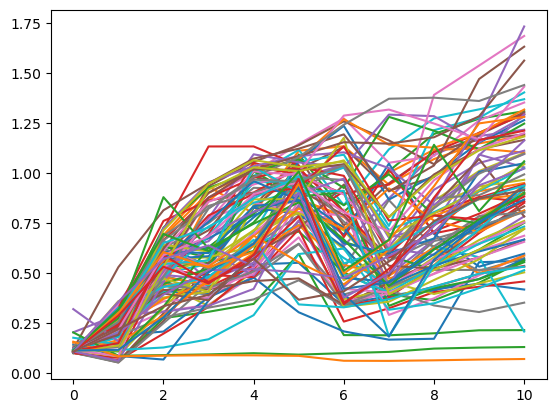

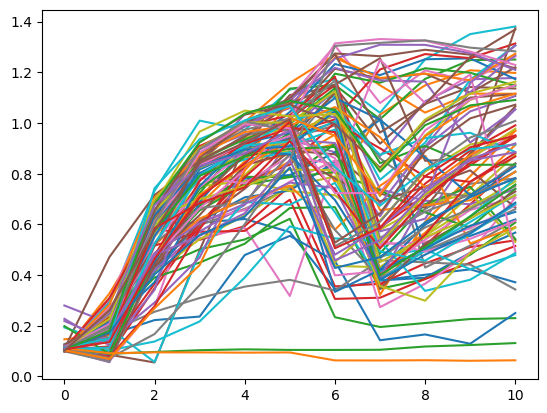

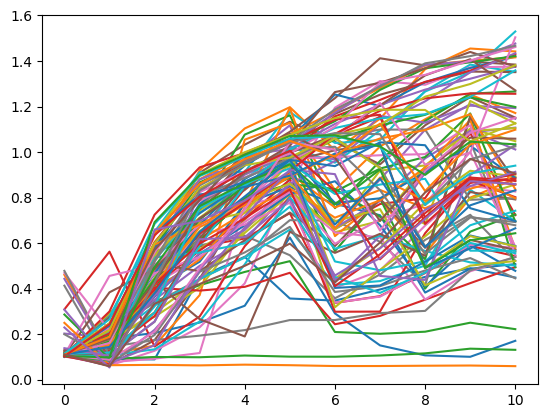

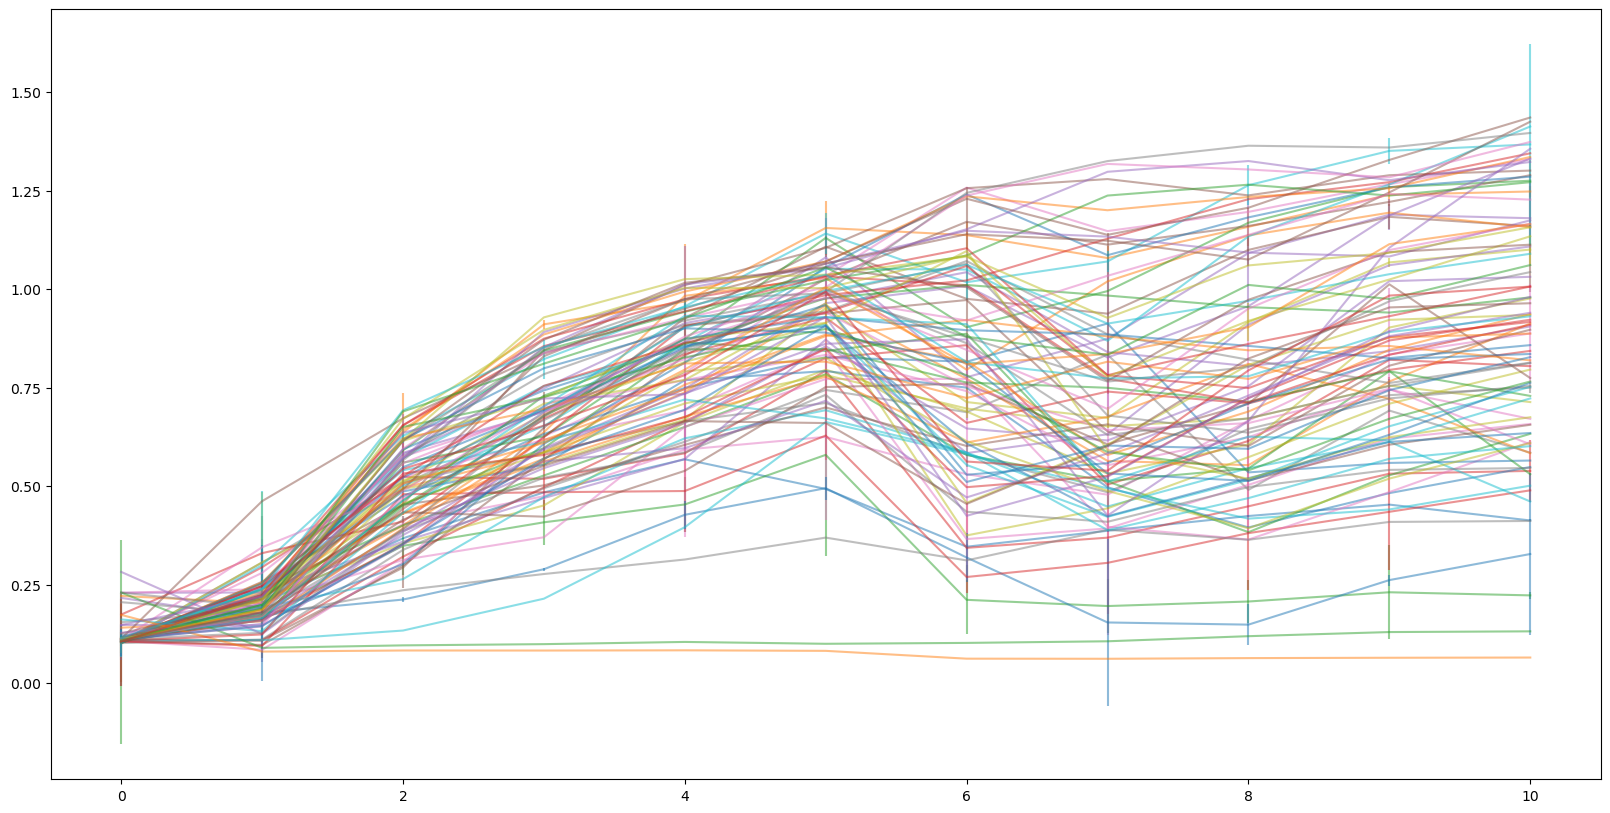

In [132]:
for df in [PlateA_750,PlateB_750,PlateC_750]:
    df = df.astype(float)
    df.T.plot(legend=False)
    
x = pd.concat([PlateA_750.astype(float), PlateB_750.astype(float), PlateC_750.astype(float)]).groupby(level=0).mean()
y = pd.concat([PlateA_750.astype(float), PlateB_750.astype(float), PlateC_750.astype(float)]).groupby(level=0).std()

x.T.plot(legend=False,yerr = y,alpha=0.5,figsize=(20,10))

<Axes: >

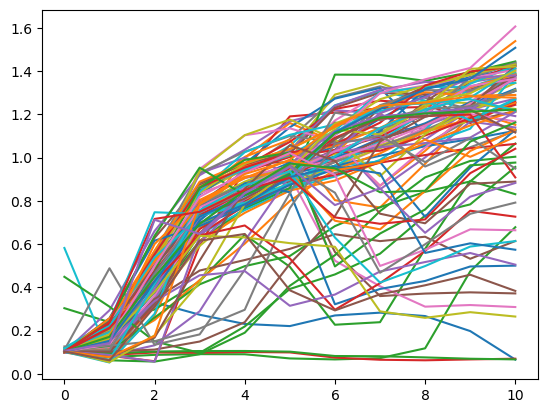

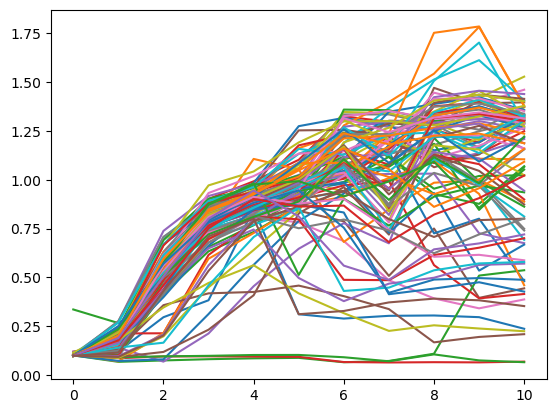

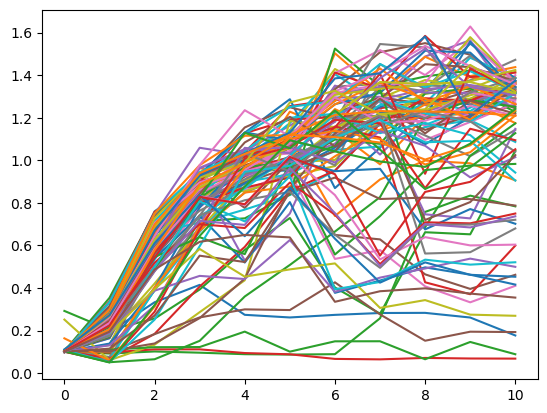

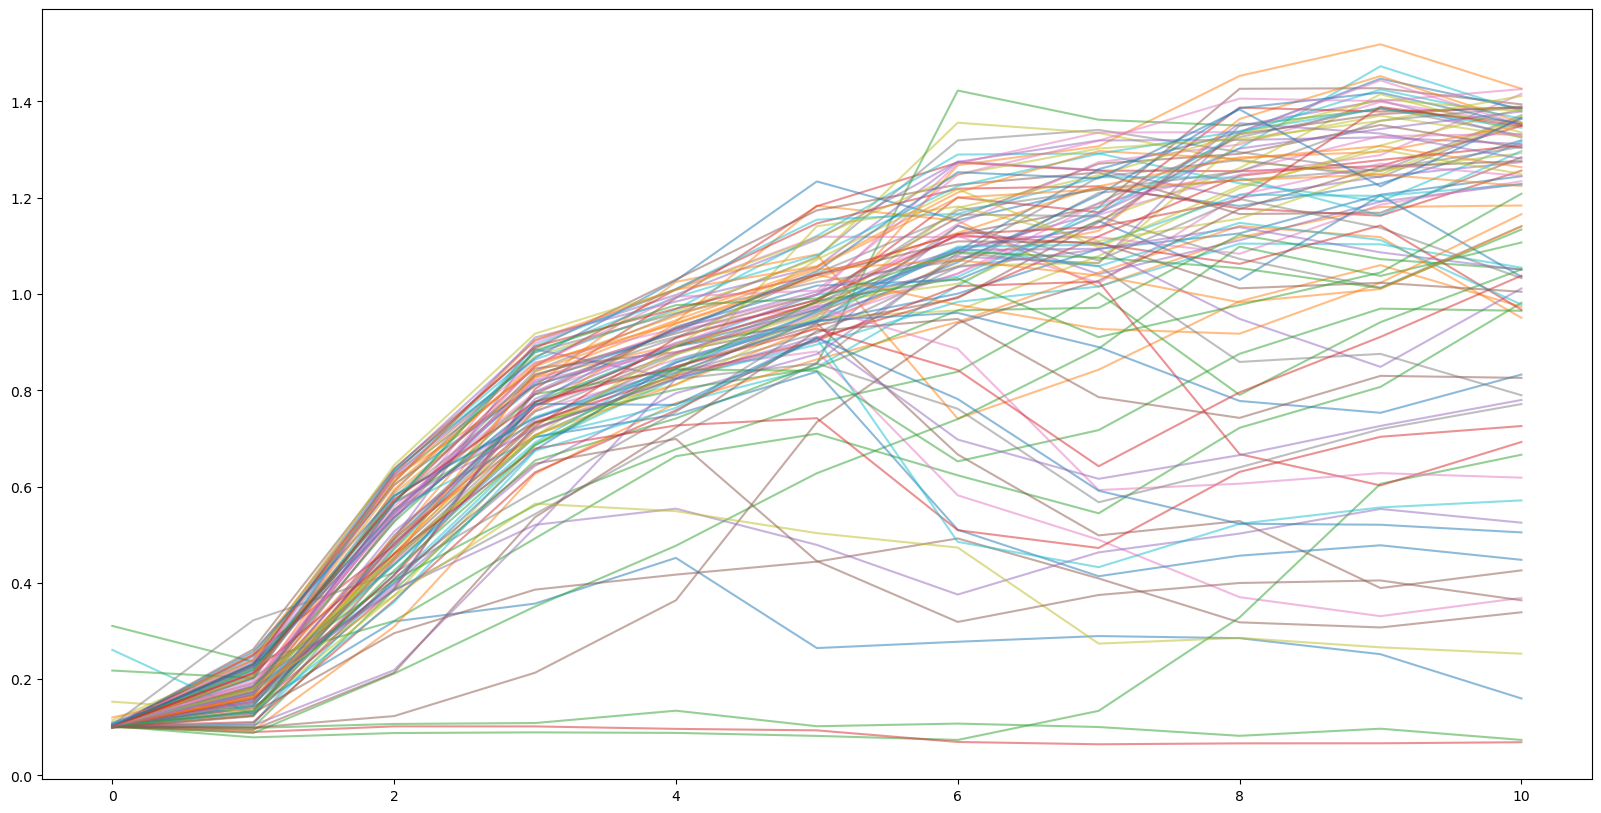

In [133]:
for df in [PlateD_750,PlateE_750,PlateF_750]:
    df = df.astype(float)
    df.T.plot(legend=False)
    
x = pd.concat([PlateD_750.astype(float), PlateE_750.astype(float), PlateF_750.astype(float)]).groupby(level=0).mean()
y = pd.concat([PlateD_750.astype(float), PlateE_750.astype(float), PlateF_750.astype(float)]).groupby(level=0).std()

x.T.plot(legend=False,yerr = y,alpha=0.5,figsize=(20,10))